# **IMPORT PACKAGE**

In [1]:
import pandas as pd
import datetime
import os

# **DATA DEFINITION**

Pada bagian ini, dipetakan keyword yang akan digunakan untuk proses scrapping (per lapangan usaha), berikut juga dengan batasan waktu dari artikel yang ingin diambil. Di Badan Pusat Statistik, terdapat 17 sektor lapangan usaha, meliputi:
1.	Pertanian, Kehutanan, dan Perikanan
2.	Pertambangan dan Penggalian
3.	Industri Pengolahan
4.	Pengadaan Listrik, Gas
5.	Pengadaan Air, Pengelolaan Sampah, Limbah dan Daur Ulang
6.	Konstruksi
7.	Perdagangan Besar dan Eceran, Reparasi Mobil dan Sepeda Motor
8.	Transportasi dan Pergudangan
9.	Penyediaan Akomodasi dan Makan Minum
10.	Informasi dan Komunikasi
11.	Jasa Keuangan dan Asuransi	
12.	Real Estat	
13.	Jasa Perusahaan
14.	Administrasi Pemerintahan, Pertahanan dan Jaminan Sosial Wajib
15.	Jasa Pendidikan
16.	Jasa Kesehatan dan Kegiatan Sosial
17.	Jasa lainnya

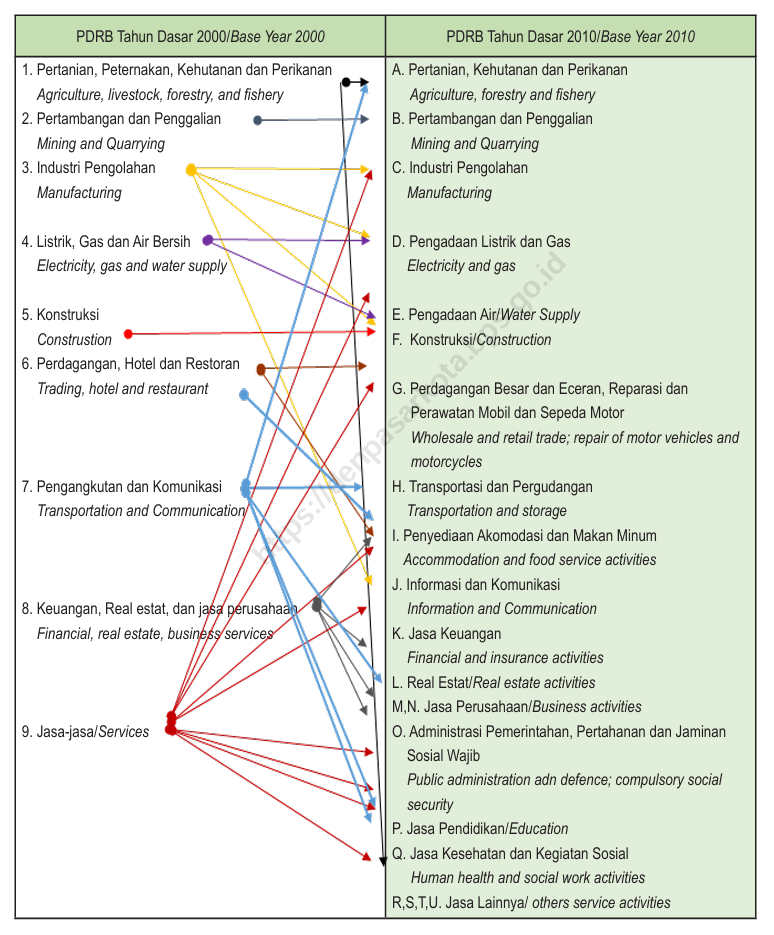

In [2]:
# Tentukan keywords dari masing-masing lapangan usaha
key_sektor = ['air','sampah','pdam']

keywords_scrap = key_sektor

# Tentukan rentang tanggal
start_date = datetime.date(2024, 10, 1)
end_date = datetime.date(2024, 11, 12)

# **SCRAPPING, PRE-CLEANING, & EXPORT (Scrapping BaliPost Lama)**

## 1. BaliPost

Fungsi dan package untuk scrapping di balipost ada pada kode di chunk berikut \
Aktifkan kalau pencarian di balipost sudah berjalan normal (saat kode ini dibuat sangat lambat)

In [3]:
# import requests
# from bs4 import BeautifulSoup
# import datetime
# import pandas as pd

# # Fungsi untuk melakukan scraping dari BaliPost
# def scrape_balipost(keyword, start_date, end_date, max_results, max_pages):
#     """
#     Fungsi untuk melakukan scraping artikel dari situs BaliPost berdasarkan keyword dan rentang tanggal.

#     Args:
#     - keyword (str): Keyword pencarian.
#     - start_date (datetime.date): Tanggal awal.
#     - end_date (datetime.date): Tanggal akhir.
#     - max_results (int): Maksimum jumlah artikel yang diambil.
#     - max_pages (int): Maksimum jumlah halaman yang diambil.

#     Returns:
#     - results (list): Daftar artikel yang berisi judul, link, tanggal, keyword, dan isi.
#     """
#     results = []

#     # Mengganti spasi dengan tanda "+" untuk keyword yang lebih dari satu kata
#     search_keyword = keyword.replace(" ", "+")
#     base_url = f"https://www.balipost.com/search/{search_keyword}"
#     current_page = 1

#     while len(results) < max_results and current_page <= max_pages:
#         url = f"{base_url}/page/{current_page}" if current_page > 1 else base_url
#         print(f"Scraping halaman {current_page} dari URL: {url}")
#         response = requests.get(url)

#         if response.status_code != 200:
#             print(f"Error saat mengakses halaman {current_page}. Status code: {response.status_code}")
#             break

#         soup = BeautifulSoup(response.content, "html.parser")
#         articles = soup.find_all("div", class_="td_module_10 td_module_wrap td-animation-stack")

#         if not articles:
#             print(f"Tidak ada artikel di halaman {current_page}, berhenti scraping.")
#             break

#         for article in articles:
#             title_element = article.find("h3", class_="entry-title td-module-title")
#             if title_element:
#                 title = title_element.text.strip()
#                 link = article.find("a")["href"]

#                 date_element = article.find("time", class_="entry-date updated td-module-date")
#                 if date_element:
#                     date_str = date_element["datetime"][:10]
#                     date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()

#                     # Cek apakah tanggal artikel dalam rentang yang diinginkan
#                     if not (start_date <= date <= end_date):
#                         continue

#                 content_element = article.find("div", class_="td-excerpt")
#                 content = content_element.text.strip() if content_element else ""

#                 results.append({"title": title, "keyword": keyword, "source": "BaliPost", "link": link, "date": date, "content": content})
#                 if len(results) >= max_results:
#                     break

#         pagination = soup.find("a", class_="page", title=str(current_page + 1))
#         if pagination:
#             current_page += 1
#         else:
#             break

#     return results


Memulai proses scrapping berita

In [4]:
# # Step 4: Scraping untuk setiap keyword
# # Takes a LOOOOOOOOOOOONG time

# all_news = []

# for keyword in keywords_scrap:
#     print(f"\nMemulai scraping untuk keyword: {keyword}")
#     news = scrape_balipost(keyword, start_date, end_date, max_results=25, max_pages=3)

#     # Tampilkan jumlah artikel yang berhasil diekstrak untuk keyword ini
#     num_articles = len(news)
#     print(f"Jumlah artikel yang diekstrak untuk keyword '{keyword}': {num_articles}")

#     all_news.extend(news)

# # Step 5: Simpan hasil ke dalam file Excel
# berita_balipost = pd.DataFrame(all_news)
# berita_balipost

In [5]:
# Import melalui kode ini kalau sudah ada raw data scrapping BaliPost yang terpisah dari proses scrapping diatas (hanya untuk BaliPost)
berita_balipost = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/berita_sektor5_triwulan4_bali.xlsx")
berita_balipost

Unnamed: 0                                              title  \
0            0  Masyarakat Diminta Waspadai Potensi Gelombang ...   
1            1  Empat Penumpang Pesawat Trigana Air Tujuan Wam...   
2            2  Dana-Swadi Siap Gratiskan Biaya Beban Air PDAM...   
3            3  Pemerintah Diminta Beri Intervensi Industri Te...   
4            4  Respon Kasus Cacar Air Massal di Tangsel, Keme...   
5            5  Timbulkan Bau Tak Sedap, Anjungan Penelokan Di...   
6            6  Debat Publik Pilkada Badung, Suyadinata Siap A...   
7            7  Perahu Terbalik di Perairan Tembles, Satu Oran...   
8            8  Pemkab Bangli Segera Cairkan Banpol Tahap II, ...   
9            9  Bantu Pemenuhan Air, TNI AD Bangun Sumur Bor d...   
10          10  Gelombang Tinggi hingga 3 Meter Landa Perairan...   
11          11  Kemarau Panjang, Permintaan Air Bersih di Kara...   
12          12  Masa Kampanye Pilkada, Badung Tunda Pencairan ...   
13          13  Simakrama, Paslon GP Berkomitmen Tuntaskan Per...   
14          14  Presiden Direktur RDG Airlines Gibrael Isaak D...   
15          15  Kapal Tenggelam di Perairan Nusa Penida, Selur...   
16          16  Pj. Sekda Badung Buka “Badung Education Fair 2...   
17          17  Air Mengalir dari Kamarnya, Perempuan Australi...   
18          18      Puluhan WNI Dari Lebanon Kembali ke Tanah Air   
19          19  Paslon GP Siap Turunkan Tarif Air Bersih dan B...   
20          20  Fraksi Golkar Desak Pencairan Hibah dan BKK Di...   
21          21  Krisis Air Bersih Mulai Landa Karangasem, Seba...   
22          22  Volume Sampah Makin Meningkat, TPA Butus Nyari...   
23          23  Belajar Penanganan Sampah dari Transformasi TP...   
24          24  Antisipasi Longsor, TPA Sarbagita Bali Padatka...   
25          25  Digodok, Regulasi TPA Tak Lagi Tampung Sampah ...   
26          26  Debat Kedua, Ini Solusi 3 Paslon Pilkada Karan...   
27          27  Tumpukan Sampah di Sisi Barat TPA Bengkala Ter...   
28          28  Musim Angin Barat, Aksi Bersih Sampah Kiriman ...   
29          29  Pasar Negara Gunakan Mesin Sampah Ecowiz, Olah...   
30          30  Kebocoran Sampah Plastik ke Laut Turun 41,68 P...   
31          31  Perusahaan Asal China Tertarik Kelola Sampah d...   
32          32  Dana-Swadi Siap Gratiskan Biaya Beban Air PDAM...   
33          33  Korupsi SPAM, Giliran Karyawan PDAM Badung Dij...   
34          34  Terindikasi Lakukan Penyambungan Ilegal Rugika...   

                                                 link       date keyword  \
0   https://www.balipost.com/news/2024/11/07/42622... 2024-11-07     air   
1   https://www.balipost.com/news/2024/11/05/42585... 2024-11-05     air   
2   https://www.balipost.com/news/2024/11/05/42580... 2024-11-05     air   
3   https://www.balipost.com/news/2024/11/01/42532... 2024-11-01     air   
4   https://www.balipost.com/news/2024/10/30/42490... 2024-10-30     air   
5   https://www.balipost.com/news/2024/10/28/42438... 2024-10-28     air   
6   https://www.balipost.com/news/2024/10/26/42425... 2024-10-26     air   
7   https://www.balipost.com/news/2024/10/25/42413... 2024-10-25     air   
8   https://www.balipost.com/news/2024/10/24/42388... 2024-10-24     air   
9   https://www.balipost.com/news/2024/10/24/42388... 2024-10-24     air   
10  https://www.balipost.com/news/2024/10/19/42286... 2024-10-19     air   
11  https://www.balipost.com/news/2024/10/19/42286... 2024-10-19     air   
12  https://www.balipost.com/news/2024/10/18/42270... 2024-10-18     air   
13  https://www.balipost.com/news/2024/10/16/42239... 2024-10-16     air   
14  https://www.balipost.com/news/2024/10/14/42213... 2024-10-14     air   
15  https://www.balipost.com/news/2024/10/12/42190... 2024-10-12     air   
16  https://www.balipost.com/news/2024/10/09/42133... 2024-10-09     air   
17  https://www.balipost.com/news/2024/10/08/42106... 2024-10-08     air   
18  https://www.balipost.com/news/2024/10/07/42104... 2024-10-07     air   

Pre-cleaning \
Hasil Scrapping BaliPost harus difilter terlebih dahulu wilayah (dari isi konten) dan judulnya (kadang tidak sesuai dengan kata yang diinginkan) \
Contoh: Kata kunci --> Ikan || Judul ditemukan --> DicarIKAN, DijanjIKAN

In [6]:
# Keyword to filter out
keywords_filter = ["TABANAN","SINGARAJA","DENPASAR","MANGUPURA","AMLAPURA","SEMARAPURA","NEGARA","GIANYAR","BANGLI"]

# Build the condition for multiple keywords
pattern = '|'.join(keywords_filter)  # Create a pattern that matches any of the keywords

# Filter out rows where 'Description' contains the keyword
berita_balipost_2 = pd.DataFrame(berita_balipost[berita_balipost['content'].str.contains(pattern, case=False, na=False)])

# Show the filtered DataFrame
print(berita_balipost_2.shape)
berita_balipost_2

(29, 6)


Unnamed: 0                                              title  \
0            0  Masyarakat Diminta Waspadai Potensi Gelombang ...   
2            2  Dana-Swadi Siap Gratiskan Biaya Beban Air PDAM...   
5            5  Timbulkan Bau Tak Sedap, Anjungan Penelokan Di...   
6            6  Debat Publik Pilkada Badung, Suyadinata Siap A...   
7            7  Perahu Terbalik di Perairan Tembles, Satu Oran...   
8            8  Pemkab Bangli Segera Cairkan Banpol Tahap II, ...   
9            9  Bantu Pemenuhan Air, TNI AD Bangun Sumur Bor d...   
10          10  Gelombang Tinggi hingga 3 Meter Landa Perairan...   
11          11  Kemarau Panjang, Permintaan Air Bersih di Kara...   
12          12  Masa Kampanye Pilkada, Badung Tunda Pencairan ...   
13          13  Simakrama, Paslon GP Berkomitmen Tuntaskan Per...   
15          15  Kapal Tenggelam di Perairan Nusa Penida, Selur...   
16          16  Pj. Sekda Badung Buka “Badung Education Fair 2...   
17          17  Air Mengalir dari Kamarnya, Perempuan Australi...   
18          18      Puluhan WNI Dari Lebanon Kembali ke Tanah Air   
19          19  Paslon GP Siap Turunkan Tarif Air Bersih dan B...   
20          20  Fraksi Golkar Desak Pencairan Hibah dan BKK Di...   
21          21  Krisis Air Bersih Mulai Landa Karangasem, Seba...   
22          22  Volume Sampah Makin Meningkat, TPA Butus Nyari...   
24          24  Antisipasi Longsor, TPA Sarbagita Bali Padatka...   
25          25  Digodok, Regulasi TPA Tak Lagi Tampung Sampah ...   
26          26  Debat Kedua, Ini Solusi 3 Paslon Pilkada Karan...   
27          27  Tumpukan Sampah di Sisi Barat TPA Bengkala Ter...   
28          28  Musim Angin Barat, Aksi Bersih Sampah Kiriman ...   
29          29  Pasar Negara Gunakan Mesin Sampah Ecowiz, Olah...   
31          31  Perusahaan Asal China Tertarik Kelola Sampah d...   
32          32  Dana-Swadi Siap Gratiskan Biaya Beban Air PDAM...   
33          33  Korupsi SPAM, Giliran Karyawan PDAM Badung Dij...   
34          34  Terindikasi Lakukan Penyambungan Ilegal Rugika...   

                                                 link       date keyword  \
0   https://www.balipost.com/news/2024/11/07/42622... 2024-11-07     air   
2   https://www.balipost.com/news/2024/11/05/42580... 2024-11-05     air   
5   https://www.balipost.com/news/2024/10/28/42438... 2024-10-28     air   
6   https://www.balipost.com/news/2024/10/26/42425... 2024-10-26     air   
7   https://www.balipost.com/news/2024/10/25/42413... 2024-10-25     air   
8   https://www.balipost.com/news/2024/10/24/42388... 2024-10-24     air   
9   https://www.balipost.com/news/2024/10/24/42388... 2024-10-24     air   
10  https://www.balipost.com/news/2024/10/19/42286... 2024-10-19     air   
11  https://www.balipost.com/news/2024/10/19/42286... 2024-10-19     air   
12  https://www.balipost.com/news/2024/10/18/42270... 2024-10-18     air   
13  https://www.balipost.com/news/2024/10/16/42239... 2024-10-16     air   
15  https://www.balipost.com/news/2024/10/12/42190... 2024-10-12     air   
16  https://www.balipost.com/news/2024/10/09/42133... 2024-10-09     air   
17  https://www.balipost.com/news/2024/10/08/42106... 2024-10-08     air   
18  https://www.balipost.com/news/2024/10/07/42104... 2024-10-07     air   
19  https://www.balipost.com/news/2024/10/07/42099... 2024-10-07     air   
20  https://www.balipost.com/news/2024/10/07/42092... 2024-10-07     air   
21  https://www.balipost.com/news/2024/10/05/42077... 2024-10-05     air   
22  https://www.balipost.com/news/2024/11/08/42633... 2024-11-08  sampah   
24  https://www.balipost.com/news/2024/11/07/42624... 2024-11-07  sampah   
25  https://www.balipost.com/news/2024/11/05/42579... 2024-11-05  sampah   
26  https://www.balipost.com/news/2024/11/03/42552... 2024-11-03  sampah   
27  https://www.balipost.com/news/2024/10/27/42434... 2024-10-27  sampah   
28  https://www.balipost.com/news/2024/10/26/42427... 2024-10-26  sampah   
29  https://www.balipost.com/news

In [7]:
# Build the regular expression pattern with word boundaries
pattern_1 = r'\b(' + '|'.join(keywords_scrap) + r')\b'  # Ensures "Ikan" is a whole word

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_balipost_3 = berita_balipost_2[berita_balipost_2['title'].str.contains(pattern_1, case=False, na=False)]

# Show the filtered DataFrame
print(berita_balipost_3.shape)
berita_balipost_3

(21, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_472\1069968203.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_balipost_3 = berita_balipost_2[berita_balipost_2['title'].str.contains(pattern_1, case=False, na=False)]


Unnamed: 0                                              title  \
2            2  Dana-Swadi Siap Gratiskan Biaya Beban Air PDAM...   
5            5  Timbulkan Bau Tak Sedap, Anjungan Penelokan Di...   
6            6  Debat Publik Pilkada Badung, Suyadinata Siap A...   
9            9  Bantu Pemenuhan Air, TNI AD Bangun Sumur Bor d...   
11          11  Kemarau Panjang, Permintaan Air Bersih di Kara...   
13          13  Simakrama, Paslon GP Berkomitmen Tuntaskan Per...   
17          17  Air Mengalir dari Kamarnya, Perempuan Australi...   
18          18      Puluhan WNI Dari Lebanon Kembali ke Tanah Air   
19          19  Paslon GP Siap Turunkan Tarif Air Bersih dan B...   
21          21  Krisis Air Bersih Mulai Landa Karangasem, Seba...   
22          22  Volume Sampah Makin Meningkat, TPA Butus Nyari...   
24          24  Antisipasi Longsor, TPA Sarbagita Bali Padatka...   
25          25  Digodok, Regulasi TPA Tak Lagi Tampung Sampah ...   
26          26  Debat Kedua, Ini Solusi 3 Paslon Pilkada Karan...   
27          27  Tumpukan Sampah di Sisi Barat TPA Bengkala Ter...   
28          28  Musim Angin Barat, Aksi Bersih Sampah Kiriman ...   
29          29  Pasar Negara Gunakan Mesin Sampah Ecowiz, Olah...   
31          31  Perusahaan Asal China Tertarik Kelola Sampah d...   
32          32  Dana-Swadi Siap Gratiskan Biaya Beban Air PDAM...   
33          33  Korupsi SPAM, Giliran Karyawan PDAM Badung Dij...   
34          34  Terindikasi Lakukan Penyambungan Ilegal Rugika...   

                                                 link       date keyword  \
2   https://www.balipost.com/news/2024/11/05/42580... 2024-11-05     air   
5   https://www.balipost.com/news/2024/10/28/42438... 2024-10-28     air   
6   https://www.balipost.com/news/2024/10/26/42425... 2024-10-26     air   
9   https://www.balipost.com/news/2024/10/24/42388... 2024-10-24     air   
11  https://www.balipost.com/news/2024/10/19/42286... 2024-10-19     air   
13  https://www.balipost.com/news/2024/10/16/42239... 2024-10-16     air   
17  https://www.balipost.com/news/2024/10/08/42106... 2024-10-08     air   
18  https://www.balipost.com/news/2024/10/07/42104... 2024-10-07     air   
19  https://www.balipost.com/news/2024/10/07/42099... 2024-10-07     air   
21  https://www.balipost.com/news/2024/10/05/42077... 2024-10-05     air   
22  https://www.balipost.com/news/2024/11/08/42633... 2024-11-08  sampah   
24  https://www.balipost.com/news/2024/11/07/42624... 2024-11-07  sampah   
25  https://www.balipost.com/news/2024/11/05/42579... 2024-11-05  sampah   
26  https://www.balipost.com/news/2024/11/03/42552... 2024-11-03  sampah   
27  https://www.balipost.com/news/2024/10/27/42434... 2024-10-27  sampah   
28  https://www.balipost.com/news/2024/10/26/42427... 2024-10-26  sampah   
29  https://www.balipost.com/news/2024/10/25/42413... 2024-10-25  sampah   
31  https://www.balipost.com/news/2024/10/04/42060... 2024-10-04  sampah   
32  https://www.balipost.com/news/2024/11/05/42580... 2024-11-05    pdam   
33  https://www.balipost.com/news/2024/10/15/42219... 2024-10-15    pdam   
34  https://www.balipost.com/news/2024/10/07/42101... 2024-10-07    pdam   

                                              content  
2   AMLAPURA, BALIPOST.com - Dalam Debat Kedua Pil...  
5   BANGLI, BALIPOST.com - Pemandangan kurang seda...  
6   MANGUPURA, BALIPOST.com - Debat publik perdana...  
9   DENPASAR, BALIPOST.com - Dalam upaya membantu ...  
11  AMLAPURA, BALIPOST.com - Kemarau panjang menye...  
13  AMLAPURA, BALIPOST.com - Persoalan air bersih ...  
17  MANGUPURA, BALIPOST.com - Karyawan hotel di Ja...  
18  TANGERANG, BALIPOST.com - Dua puluh orang warg...  
19  AMLAPURA, BALIPOST.com - Pasangan calon (Paslo...  
21  AMLAPURA, BALIPOST.com - Musim kemarau yang be...  
22  AMLAPURA, BALIPOST.com - Tempat Pembuangan Akh...  
24  DENPASAR, BALIPOST. com - Untuk mengantisipasi...  
25  DENPASAR, BALIPOST.com - Kementerian Lingkunga...  
26  MANGUPURA, BALIPOST.com 

In [8]:
# Remove Duplication
berita_balipost_3 = berita_balipost_3.drop_duplicates(subset='title', keep='first')
print(berita_balipost_3.shape)
berita_balipost_3

(20, 6)


Unnamed: 0                                              title  \
2            2  Dana-Swadi Siap Gratiskan Biaya Beban Air PDAM...   
5            5  Timbulkan Bau Tak Sedap, Anjungan Penelokan Di...   
6            6  Debat Publik Pilkada Badung, Suyadinata Siap A...   
9            9  Bantu Pemenuhan Air, TNI AD Bangun Sumur Bor d...   
11          11  Kemarau Panjang, Permintaan Air Bersih di Kara...   
13          13  Simakrama, Paslon GP Berkomitmen Tuntaskan Per...   
17          17  Air Mengalir dari Kamarnya, Perempuan Australi...   
18          18      Puluhan WNI Dari Lebanon Kembali ke Tanah Air   
19          19  Paslon GP Siap Turunkan Tarif Air Bersih dan B...   
21          21  Krisis Air Bersih Mulai Landa Karangasem, Seba...   
22          22  Volume Sampah Makin Meningkat, TPA Butus Nyari...   
24          24  Antisipasi Longsor, TPA Sarbagita Bali Padatka...   
25          25  Digodok, Regulasi TPA Tak Lagi Tampung Sampah ...   
26          26  Debat Kedua, Ini Solusi 3 Paslon Pilkada Karan...   
27          27  Tumpukan Sampah di Sisi Barat TPA Bengkala Ter...   
28          28  Musim Angin Barat, Aksi Bersih Sampah Kiriman ...   
29          29  Pasar Negara Gunakan Mesin Sampah Ecowiz, Olah...   
31          31  Perusahaan Asal China Tertarik Kelola Sampah d...   
33          33  Korupsi SPAM, Giliran Karyawan PDAM Badung Dij...   
34          34  Terindikasi Lakukan Penyambungan Ilegal Rugika...   

                                                 link       date keyword  \
2   https://www.balipost.com/news/2024/11/05/42580... 2024-11-05     air   
5   https://www.balipost.com/news/2024/10/28/42438... 2024-10-28     air   
6   https://www.balipost.com/news/2024/10/26/42425... 2024-10-26     air   
9   https://www.balipost.com/news/2024/10/24/42388... 2024-10-24     air   
11  https://www.balipost.com/news/2024/10/19/42286... 2024-10-19     air   
13  https://www.balipost.com/news/2024/10/16/42239... 2024-10-16     air   
17  https://www.balipost.com/news/2024/10/08/42106... 2024-10-08     air   
18  https://www.balipost.com/news/2024/10/07/42104... 2024-10-07     air   
19  https://www.balipost.com/news/2024/10/07/42099... 2024-10-07     air   
21  https://www.balipost.com/news/2024/10/05/42077... 2024-10-05     air   
22  https://www.balipost.com/news/2024/11/08/42633... 2024-11-08  sampah   
24  https://www.balipost.com/news/2024/11/07/42624... 2024-11-07  sampah   
25  https://www.balipost.com/news/2024/11/05/42579... 2024-11-05  sampah   
26  https://www.balipost.com/news/2024/11/03/42552... 2024-11-03  sampah   
27  https://www.balipost.com/news/2024/10/27/42434... 2024-10-27  sampah   
28  https://www.balipost.com/news/2024/10/26/42427... 2024-10-26  sampah   
29  https://www.balipost.com/news/2024/10/25/42413... 2024-10-25  sampah   
31  https://www.balipost.com/news/2024/10/04/42060... 2024-10-04  sampah   
33  https://www.balipost.com/news/2024/10/15/42219... 2024-10-15    pdam   
34  https://www.balipost.com/news/2024/10/07/42101... 2024-10-07    pdam   

                                              content  
2   AMLAPURA, BALIPOST.com - Dalam Debat Kedua Pil...  
5   BANGLI, BALIPOST.com - Pemandangan kurang seda...  
6   MANGUPURA, BALIPOST.com - Debat publik perdana...  
9   DENPASAR, BALIPOST.com - Dalam upaya membantu ...  
11  AMLAPURA, BALIPOST.com - Kemarau panjang menye...  
13  AMLAPURA, BALIPOST.com - Persoalan air bersih ...  
17  MANGUPURA, BALIPOST.com - Karyawan hotel di Ja...  
18  TANGERANG, BALIPOST.com - Dua puluh orang warg...  
19  AMLAPURA, BALIPOST.com - Pasangan calon (Paslo...  
21  AMLAPURA, BALIPOST.com - Musim kemarau yang be...  
22  AMLAPURA, BALIPOST.com - Tempat Pembuangan Akh...  
24  DENPASAR, BALIPOST. com - Untuk mengantisipasi...  
25  DENPASAR, BALIPOST.com - Kementerian Lingkunga...  
26  MANGUPURA, BALIPOST.com - Debat kedua bagi pas...  
27  SINGARAJA, BALIPOST.com - Cuaca panas ekstrim ...  
28  MANGUPURA, BALIPOST.com - Sampah kiriman mulai...  
29  N

## 2. DetikBali

In [9]:
import math
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# Define web scraping functions
# Fungsi untuk menuju ke portal berita
def search_url(query, date_start, date_end, pages_num=1):
    url = f"https://www.detik.com/search/searchnews?query={query}&siteid=123&sortby=time&fromdatex={date_start}&todatex={date_end}&page={pages_num}&result_type=relevansi"
    
    print(url)
    response = requests.get(url)
    page = bs(response.content, "html.parser")

    return page

# Fungsi untuk menghitung jumlah artikel di halaman terakhir
def last_page_article_count(query, date_start, date_end, page_num):
    last_page = search_url(query, date_start, date_end, page_num)
    article_list = last_page.find("div", {"class": "list-content"})

    if article_list:
        articles = article_list.find_all('article', class_='list-content__item')           
    article_count = len(articles)
    
    return article_count

def news_search_results(query, date_start, date_end):
    page = search_url(query, date_start, date_end)
    
    pagination = page.find("div", {"class": "pagination"})
    if pagination:
        page_numbers = pagination.find_all('a', class_='pagination__item')
        if page_numbers:
            last_page_number = int(page_numbers[-2].text)

        # Menghitung jumlah artikel di halaman terakhir
        last_page_articles = last_page_article_count(query, date_start, date_end, last_page_number)

        # Menghitung jumlah artikel yang diperoleh
        num = (last_page_number - 1) * 10 + last_page_articles
    else:
        num = 0
        last_page_number = 1
    
    return num, last_page_number

# Fungsi untuk mendapatkan isi konten
def news_get_content(article_url):
    response = requests.get(article_url)
    content_page = bs(response.content, "html.parser")

    content_list = []
    multiple_page = content_page.find("div", {"class": "detail__multiple"})
    if multiple_page:
        multiple_page = [x.get("href") for x in multiple_page.find_all("a")][:-1]
        for page in multiple_page:
            response = requests.get(page)
            content_page = bs(response.content, "html.parser")
            content_list.extend([p.get_text() for p in content_page.find_all("p") if not p.get_text().startswith('\n\n\n\nHalaman\n\n') and
                                p.get_text() not in ['',
                                                    '[Gambas:Instagram]',
                                                    '[Gambas:Video 20detik]',
                                                    '\r\nADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n',
                                                    '\r\n        SCROLL TO RESUME CONTENT\r\n  ',
                                                    'Selengkapnya di halaman selanjutnya.',
                                                    '\n\t\t\t\t\tAyo share cerita pengalaman dan upload photo album travelingmu di sini.\n\n\t\t\t\t\t\t\t\t\t\t\tSilakan Daftar atau Masuk\n']])
    else:
        content_list.extend([p.get_text() for p in content_page.find_all("p")
                            if p.get_text() not in ['',
                                                    '[Gambas:Instagram]',
                                                    '[Gambas:Video 20detik]',
                                                    '\r\nADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n',
                                                    '\r\n        SCROLL TO RESUME CONTENT\r\n  ',
                                                    '\n\t\t\t\t\tAyo share cerita pengalaman dan upload photo album travelingmu di sini.\n\n\t\t\t\t\t\t\t\t\t\t\tSilakan Daftar atau Masuk\n']])

    content_list = '\n\n'.join(content_list)

    return content_list

# Fungsi untuk mengecek berita yang merupakan advertorial
def news_advertorial_check(article_url):
    response = requests.get(article_url)
    content_page = bs(response.content, "html.parser")

    author = content_page.find("meta", {"content": "Advertorial"})

    return bool(author)

# Fungsi untuk mencari artikel dengan output adalah jumlah artikel dan halaman terakhir
def search_articles(query, from_date, to_date, ads_article, article_content):
    results_num, last_page = news_search_results(query, from_date, to_date)
        
    print(f"Result num: {results_num}")
    print(f"Last page: {last_page}")

    return results_num, last_page

# Fungsi untuk memperoleh list artikel
def articles_list(query, from_date, to_date, ads_article, article_content, num_articles, last_page):
    article_lists = []
    pages = math.ceil(num_articles / 10)
    
    print("\nMemulai Scrapping dari DetikBali untuk keyword:", query)
    for i in range(1, pages + 1):
        print("Scrapping halaman", i, "dari URL: ")
        page = search_url(query, from_date, to_date, i)
        articles = page.find_all("article", class_="list-content__item")

        for article in articles:
            title = article.find("a", {"class": "media__link"}).get('dtr-ttl')
            category = article.find('h2', class_='media__subtitle').text.strip()
            publish_date = article.find('span', title=True).get('title')
            article_url = article.find("a", {"class": "media__link"}).get('href')
                
            # print(f"Title: {title}")
            # print(f"Category: {category}")
            # print(f"Publish Date: {publish_date}")
            # print(f"Article URL: {article_url}")

            if ads_article and news_advertorial_check(article_url):
                continue
            else:
                if article_content:
                    content = news_get_content(article_url)
                    if (
                        any(title in existing_article["title"] for existing_article in article_lists) or 
                        any(content in existing_article["content"] for existing_article in article_lists)
                    ):
                        continue
                    else:
                        article_lists.append({
                            "title": title,
                            "keyword": query,
                            "source": category,
                            "link": article_url,
                            "date": publish_date,
                            "content": content
                        })
                else:
                    if any(title in existing_article["title"] for existing_article in article_lists):
                        continue
                    else:
                        article_lists.append({
                            "title": title,
                            "keyword": query,
                            "link": article_url,
                            "date": publish_date
                        })
            if len(article_lists) == num_articles:
                break
        if len(article_lists) == num_articles:
            break
            
    print(f"Jumlah artikel dengan kata kunci {keyword}: {len(article_lists)} artikel.")
    data = article_lists
    return data

In [10]:
# Scraping untuk setiap keyword
all_news_detik = []

for keyword in keywords_scrap:
    search_keyword = keyword.replace(" ", "+")
    news = articles_list(search_keyword, start_date.strftime('%d/%m/%Y'), end_date.strftime('%d/%m/%Y'), False, True, 25, 5)
    all_news_detik.extend(news)

# Simpan hasil ke dalam file Excel
berita_detik = pd.DataFrame(all_news_detik) 
berita_detik


Memulai Scrapping dari DetikBali untuk keyword: air
Scrapping halaman 1 dari URL: 
https://www.detik.com/search/searchnews?query=air&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=1&result_type=relevansi
Scrapping halaman 2 dari URL: 
https://www.detik.com/search/searchnews?query=air&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=2&result_type=relevansi
Scrapping halaman 3 dari URL: 
https://www.detik.com/search/searchnews?query=air&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=3&result_type=relevansi
Jumlah artikel dengan kata kunci air: 25 artikel.

Memulai Scrapping dari DetikBali untuk keyword: sampah
Scrapping halaman 1 dari URL: 
https://www.detik.com/search/searchnews?query=sampah&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=1&result_type=relevansi
Scrapping halaman 2 dari URL: 
https://www.detik.com/search/searchnews?query=sampah&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024

title keyword     source  \
0   Progres Pembangunan Bendungan Sidan Capai 95%,...     air  detikBali   
1   Hari Pahlawan, Pj Sekda Badung Ajak Anak Muda ...     air  detikBali   
2   Kala Masalah Piala Dunia U20 hingga Krisis Air...     air  detikBali   
3   Mulia-PAS dan Koster-Giri Adu Solusi soal Kris...     air  detikBali   
4   Subak Spirit Festival 2024 Jadi Ajang Pelestar...     air  detikBali   
..                                                ...     ...        ...   
70  Debat Perdana Pilbup Kupang 2024: Messerassi-M...    pdam  detikBali   
71  Kementerian KKP Cabut Izin Pemanfaatan Ruang L...    pdam  detikBali   
72  Petugas PDAM Terseret Kasus Pencurian Air di P...    pdam  detikBali   
73  Koster Bakal Bentuk BUMD untuk Kelola Air Bers...    pdam  detikBali   
74  Deretan Janji Cabup-cawabup Karangasem Saat De...    pdam  detikBali   

                                                 link  \
0   https://www.detik.com/bali/berita/d-7633507/pr...   
1   https://www.detik.com/bali/berita/d-7632633/ha...   
2   https://www.detik.com/bali/pilkada/d-7630920/k...   
3   https://www.detik.com/bali/pilkada/d-7630627/m...   
4   https://www.detik.com/bali/wisata/d-7630341/su...   
..                                                ...   
70  https://www.detik.com/bali/pilkada/d-7584427/d...   
71  https://www.detik.com/bali/nusra/d-7571752/kem...   
72  https://www.detik.com/bali/hukum-dan-kriminal/...   
73  https://www.detik.com/bali/pilkada/d-7625239/k...   
74  https://www.detik.com/bali/pilkada/d-7609560/d...   

                             date  \
0    Senin, 11 Nov 2024 18:26 WIB   
1    Senin, 11 Nov 2024 13:35 WIB   
2   Minggu, 10 Nov 2024 08:05 WIB   
3    Sabtu, 09 Nov 2024 20:51 WIB   
4    Sabtu, 09 Nov 2024 17:05 WIB   
..                            ...   
70   Sabtu, 12 Okt 2024 12:16 WIB   
71   Jumat, 04 Okt 2024 13:12 WIB   
72   Senin, 14 Okt 2024 22:45 WIB   
73    Rabu, 06 Nov 2024 14:50 WIB   
74   Senin, 28 Okt 2024 08:24 WIB   

                                              content  
0   Progres pembangunan Bendungan Sidan di perbata...  
1   Pemerintah Kabupaten Badung menggelar Upacara ...  
2   Pembatalan penyelenggaraan Piala Dunia U20 hin...  
3   Dua pasangan calon (paslon) saling adu solusi ...  
4   Subak Spirit Festival 2024 menjadi ajang peles...  
..                                                ...  
70  Pasangan calon bupati-wakil bupati Kupang, Mes...  
71  Kementerian Kelautan dan Perikanan (KKP) melal...  
72  Penyidik Tindak Pidana Khusus (Tipidsus) Kejak...  
73  Calon gubernur (cagub) Bali, Wayan Koster, aka...  
74  Komisi Pemilihan Umum (KPU) Karangasem menggel...  

[75 rows x 6 columns]

Pre-cleaning

In [11]:
# Filter Wilayah
keywords_filter = ["Tabanan","Singaraja","Denpasar","Badung","Karangasem","Klungkung","Jembrana","Gianyar","Bangli"]

# Build the condition for multiple keywords
pattern = '|'.join(keywords_filter)  # Create a pattern that matches any of the keywords

# Filter out rows where 'Description' contains the keyword
berita_detik_2 = pd.DataFrame(berita_detik[berita_detik['content'].str.contains(pattern, case=False, na=False)])

# Show the filtered DataFrame
print(berita_detik_2.shape)
berita_detik_2

(47, 6)


title keyword     source  \
0   Progres Pembangunan Bendungan Sidan Capai 95%,...     air  detikBali   
1   Hari Pahlawan, Pj Sekda Badung Ajak Anak Muda ...     air  detikBali   
2   Kala Masalah Piala Dunia U20 hingga Krisis Air...     air  detikBali   
3   Mulia-PAS dan Koster-Giri Adu Solusi soal Kris...     air  detikBali   
4   Subak Spirit Festival 2024 Jadi Ajang Pelestar...     air  detikBali   
5   Adi Arnawa Optimistis Selesaikan Permasalahan ...     air  detikBali   
9   Warga Petandakan Keluhkan Infrastruktur-Air Be...     air  detikBali   
12  Antisipasi Krisis Air, De Gadjah Janji Lestari...     air  detikBali   
14  Atasi Masalah Air, Gus Par-Pandu Klaim Bakal K...     air  detikBali   
15  Ismaya Tuding Maraknya Galian C Jadi Penyebab ...     air  detikBali   
16  Gede Dana Janji Gratiskan Air PDAM di Bawah 20...     air  detikBali   
19  Mulyadi Soroti Bendungan Sudimara, Sanjaya Jag...     air  detikBali   
21     Kejari Badung Tahan Pencuri Air PDAM di Pecatu     air  detikBali   
22  Koster-Giri Janjikan Ambulans Siaga-Tuntaskan ...     air  detikBali   
23  Dana-Swadi Janjikan Penyaluran Air Bersih ke S...     air  detikBali   
27  KLH Evaluasi Teknologi Pengolahan Sampah di TP...  sampah  detikBali   
28  Pemkot Denpasar Keruk Sampah di Got-Sungai unt...  sampah  detikBali   
30  Saling Serang Mulyadi dan Sanjaya soal Penanga...  sampah  detikBali   
31  Tiga Paslon Pilbup Karangasem Adu Gagasan Kelo...  sampah  detikBali   
32  Pengawasan Tempat Pembuangan Sampah di Denpasa...  sampah  detikBali   
34  Melihat Aktivitas Hari Pertama Wajib Pilah Sam...  sampah  detikBali   
36  Resmi Dilantik, Pimpinan DPRD Denpasar Fokus L...  sampah  detikBali   
37  Giri Prasta Ingin Kelola Sampah TPA Suwung Pak...  sampah  detikBali   
39  Pemkab Jembrana Dapat Hibah Mesin Pengolahan S...  sampah  detikBali   
40  Pemkot Denpasar Akan Bagikan Kantong Pemilah S...  sampah  detikBali   
41  KLH Akan Buat Aturan Sampah Hotel dan Restoran...  sampah  detikBali   
43  Bakar Sampah di Pekarangan Rumah, Lansia di Ta...  sampah  detikBali   
44  Nyalon Bupati dan Wakil Bupati Klungkung, 2 An...  sampah  detikBali   
45  Terbelit Utang, 60 Pekerja Pemilah Sampah di T...  sampah  detikBali   
46  Jembrana Genjot Produksi RDF, Targetkan 50 Ton...  sampah  detikBali   
47  Ambara Yakin Prabowo Bantu Tangani Sampah dan ...  sampah  detikBali   
48  Debat Panas soal Sampah, Arya Wibawa Tak Sepak...  sampah  detikBali   
50  Gede Dana Janji Gratiskan Air PDAM di Bawah 20...    pdam  detikBali   
51     Kejari Badung Tahan Pencuri Air PDAM di Pecatu    pdam  detikBali   
52  Tersangka Pencurian Air PDAM di Kuta Selatan j...    pdam  detikBali   
53  Pencurian Air Besar-besaran Bikin PDAM Badung ...    pdam  detikBali   
54  Gus Par-Pandu Janji Turunkan Tarif Air PDAM, P...    pdam  detikBali   
56  De Gadjah Optimistis Tuntaskan Masalah Air di ...    pdam  detikBali   
57  Mulyadi Soroti Bendungan Sudimara, Sanjaya Jag...    pdam  detikBali   
58  Petugas PDAM yang Terseret Kasus Curi Air Dapa...    pdam  detikBali   
59  Adu Kiat Dua Cabup-Cawabup Badung Atasi Krisis...    pdam  detikBali   
60  Antisipasi Erupsi Gunung Agung, Gede Dana Buat...    pdam  detikBali   
61  Sentil Janji Air Gratis, Sedana ke Raden Cahyo...    pdam  detikBali   
66  Saling Serang Raden Cahyo dan Sedana Arta di D...    pdam  detikBali   
67  Bule Belanja Ogah Bayar hingga Spa Plus-plus B...    pdam  detikBali   
72  Petugas PDAM Terseret Kasus Pencurian Air di P...    pdam  detikBali   
74  Deretan Janji Cabup-cawabup Karangasem Saat De...    pdam  detikBali   

                                                 link  \
0   https://www.detik.com/bali/berita/d-7633507/pr...   
1   https://www.detik.com/bali/berita/d-7632633/ha...   
2   https://www.detik.com/bali/pilkada/d-7630920/k...   
3   https://www.detik.com/bali/pilkada/d-7630627/m...   
4   https://www.detik.com/bali/wisata/d-7630341/su...   
5   https://www.detik.com/bali/pilkada/d-7629329/a...   


In [12]:
# Build the regular expression pattern with word boundaries
pattern = r'\b(' + '|'.join(keywords_scrap) + r')\b'

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_detik_3 = berita_detik_2[berita_detik_2['title'].str.contains(pattern, case=False, na=False)]

# Show the filtered DataFrame
print(berita_detik_3.shape)
berita_detik_3

(42, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_472\1307647291.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_detik_3 = berita_detik_2[berita_detik_2['title'].str.contains(pattern, case=False, na=False)]


title keyword     source  \
0   Progres Pembangunan Bendungan Sidan Capai 95%,...     air  detikBali   
1   Hari Pahlawan, Pj Sekda Badung Ajak Anak Muda ...     air  detikBali   
2   Kala Masalah Piala Dunia U20 hingga Krisis Air...     air  detikBali   
3   Mulia-PAS dan Koster-Giri Adu Solusi soal Kris...     air  detikBali   
4   Subak Spirit Festival 2024 Jadi Ajang Pelestar...     air  detikBali   
5   Adi Arnawa Optimistis Selesaikan Permasalahan ...     air  detikBali   
9   Warga Petandakan Keluhkan Infrastruktur-Air Be...     air  detikBali   
12  Antisipasi Krisis Air, De Gadjah Janji Lestari...     air  detikBali   
14  Atasi Masalah Air, Gus Par-Pandu Klaim Bakal K...     air  detikBali   
15  Ismaya Tuding Maraknya Galian C Jadi Penyebab ...     air  detikBali   
16  Gede Dana Janji Gratiskan Air PDAM di Bawah 20...     air  detikBali   
19  Mulyadi Soroti Bendungan Sudimara, Sanjaya Jag...     air  detikBali   
21     Kejari Badung Tahan Pencuri Air PDAM di Pecatu     air  detikBali   
22  Koster-Giri Janjikan Ambulans Siaga-Tuntaskan ...     air  detikBali   
23  Dana-Swadi Janjikan Penyaluran Air Bersih ke S...     air  detikBali   
27  KLH Evaluasi Teknologi Pengolahan Sampah di TP...  sampah  detikBali   
28  Pemkot Denpasar Keruk Sampah di Got-Sungai unt...  sampah  detikBali   
30  Saling Serang Mulyadi dan Sanjaya soal Penanga...  sampah  detikBali   
31  Tiga Paslon Pilbup Karangasem Adu Gagasan Kelo...  sampah  detikBali   
32  Pengawasan Tempat Pembuangan Sampah di Denpasa...  sampah  detikBali   
34  Melihat Aktivitas Hari Pertama Wajib Pilah Sam...  sampah  detikBali   
36  Resmi Dilantik, Pimpinan DPRD Denpasar Fokus L...  sampah  detikBali   
37  Giri Prasta Ingin Kelola Sampah TPA Suwung Pak...  sampah  detikBali   
39  Pemkab Jembrana Dapat Hibah Mesin Pengolahan S...  sampah  detikBali   
40  Pemkot Denpasar Akan Bagikan Kantong Pemilah S...  sampah  detikBali   
41  KLH Akan Buat Aturan Sampah Hotel dan Restoran...  sampah  detikBali   
43  Bakar Sampah di Pekarangan Rumah, Lansia di Ta...  sampah  detikBali   
45  Terbelit Utang, 60 Pekerja Pemilah Sampah di T...  sampah  detikBali   
46  Jembrana Genjot Produksi RDF, Targetkan 50 Ton...  sampah  detikBali   
47  Ambara Yakin Prabowo Bantu Tangani Sampah dan ...  sampah  detikBali   
48  Debat Panas soal Sampah, Arya Wibawa Tak Sepak...  sampah  detikBali   
50  Gede Dana Janji Gratiskan Air PDAM di Bawah 20...    pdam  detikBali   
51     Kejari Badung Tahan Pencuri Air PDAM di Pecatu    pdam  detikBali   
52  Tersangka Pencurian Air PDAM di Kuta Selatan j...    pdam  detikBali   
53  Pencurian Air Besar-besaran Bikin PDAM Badung ...    pdam  detikBali   
54  Gus Par-Pandu Janji Turunkan Tarif Air PDAM, P...    pdam  detikBali   
56  De Gadjah Optimistis Tuntaskan Masalah Air di ...    pdam  detikBali   
57  Mulyadi Soroti Bendungan Sudimara, Sanjaya Jag...    pdam  detikBali   
58  Petugas PDAM yang Terseret Kasus Curi Air Dapa...    pdam  detikBali   
59  Adu Kiat Dua Cabup-Cawabup Badung Atasi Krisis...    pdam  detikBali   
61  Sentil Janji Air Gratis, Sedana ke Raden Cahyo...    pdam  detikBali   
72  Petugas PDAM Terseret Kasus Pencurian Air di P...    pdam  detikBali   

                                                 link  \
0   https://www.detik.com/bali/berita/d-7633507/pr...   
1   https://www.detik.com/bali/berita/d-7632633/ha...   
2   https://www.detik.com/bali/pilkada/d-7630920/k...   
3   https://www.detik.com/bali/pilkada/d-7630627/m...   
4   https://www.detik.com/bali/wisata/d-7630341/su...   
5   https://www.detik.com/bali/pilkada/d-7629329/a...   
9   https://www.detik.com/bali/pilkada/d-7620196/w...   
12  https://www.detik.com/bali/pilkada/d-7624093/a...   
14  https://www.detik.com/bali/pilkada/d-7620652/a...   
15  https://www.detik.com/bali/pilkada/d-7620591/i...   
16  https://www.detik.com/bali/pilkada/d-7620448/g...   
19  https://www.detik.com/bali/pilkada/d-7616358/m...   
21  https://www.detik.com/bali/hukum-d

Menghapus berita yang duplikat

In [13]:
# Remove Duplication
berita_detik_4 = berita_detik_3.drop_duplicates(subset='title', keep='first')
print(berita_detik_4.shape)
berita_detik_4

(39, 6)


title keyword     source  \
0   Progres Pembangunan Bendungan Sidan Capai 95%,...     air  detikBali   
1   Hari Pahlawan, Pj Sekda Badung Ajak Anak Muda ...     air  detikBali   
2   Kala Masalah Piala Dunia U20 hingga Krisis Air...     air  detikBali   
3   Mulia-PAS dan Koster-Giri Adu Solusi soal Kris...     air  detikBali   
4   Subak Spirit Festival 2024 Jadi Ajang Pelestar...     air  detikBali   
5   Adi Arnawa Optimistis Selesaikan Permasalahan ...     air  detikBali   
9   Warga Petandakan Keluhkan Infrastruktur-Air Be...     air  detikBali   
12  Antisipasi Krisis Air, De Gadjah Janji Lestari...     air  detikBali   
14  Atasi Masalah Air, Gus Par-Pandu Klaim Bakal K...     air  detikBali   
15  Ismaya Tuding Maraknya Galian C Jadi Penyebab ...     air  detikBali   
16  Gede Dana Janji Gratiskan Air PDAM di Bawah 20...     air  detikBali   
19  Mulyadi Soroti Bendungan Sudimara, Sanjaya Jag...     air  detikBali   
21     Kejari Badung Tahan Pencuri Air PDAM di Pecatu     air  detikBali   
22  Koster-Giri Janjikan Ambulans Siaga-Tuntaskan ...     air  detikBali   
23  Dana-Swadi Janjikan Penyaluran Air Bersih ke S...     air  detikBali   
27  KLH Evaluasi Teknologi Pengolahan Sampah di TP...  sampah  detikBali   
28  Pemkot Denpasar Keruk Sampah di Got-Sungai unt...  sampah  detikBali   
30  Saling Serang Mulyadi dan Sanjaya soal Penanga...  sampah  detikBali   
31  Tiga Paslon Pilbup Karangasem Adu Gagasan Kelo...  sampah  detikBali   
32  Pengawasan Tempat Pembuangan Sampah di Denpasa...  sampah  detikBali   
34  Melihat Aktivitas Hari Pertama Wajib Pilah Sam...  sampah  detikBali   
36  Resmi Dilantik, Pimpinan DPRD Denpasar Fokus L...  sampah  detikBali   
37  Giri Prasta Ingin Kelola Sampah TPA Suwung Pak...  sampah  detikBali   
39  Pemkab Jembrana Dapat Hibah Mesin Pengolahan S...  sampah  detikBali   
40  Pemkot Denpasar Akan Bagikan Kantong Pemilah S...  sampah  detikBali   
41  KLH Akan Buat Aturan Sampah Hotel dan Restoran...  sampah  detikBali   
43  Bakar Sampah di Pekarangan Rumah, Lansia di Ta...  sampah  detikBali   
45  Terbelit Utang, 60 Pekerja Pemilah Sampah di T...  sampah  detikBali   
46  Jembrana Genjot Produksi RDF, Targetkan 50 Ton...  sampah  detikBali   
47  Ambara Yakin Prabowo Bantu Tangani Sampah dan ...  sampah  detikBali   
48  Debat Panas soal Sampah, Arya Wibawa Tak Sepak...  sampah  detikBali   
52  Tersangka Pencurian Air PDAM di Kuta Selatan j...    pdam  detikBali   
53  Pencurian Air Besar-besaran Bikin PDAM Badung ...    pdam  detikBali   
54  Gus Par-Pandu Janji Turunkan Tarif Air PDAM, P...    pdam  detikBali   
56  De Gadjah Optimistis Tuntaskan Masalah Air di ...    pdam  detikBali   
58  Petugas PDAM yang Terseret Kasus Curi Air Dapa...    pdam  detikBali   
59  Adu Kiat Dua Cabup-Cawabup Badung Atasi Krisis...    pdam  detikBali   
61  Sentil Janji Air Gratis, Sedana ke Raden Cahyo...    pdam  detikBali   
72  Petugas PDAM Terseret Kasus Pencurian Air di P...    pdam  detikBali   

                                                 link  \
0   https://www.detik.com/bali/berita/d-7633507/pr...   
1   https://www.detik.com/bali/berita/d-7632633/ha...   
2   https://www.detik.com/bali/pilkada/d-7630920/k...   
3   https://www.detik.com/bali/pilkada/d-7630627/m...   
4   https://www.detik.com/bali/wisata/d-7630341/su...   
5   https://www.detik.com/bali/pilkada/d-7629329/a...   
9   https://www.detik.com/bali/pilkada/d-7620196/w...   
12  https://www.detik.com/bali/pilkada/d-7624093/a...   
14  https://www.detik.com/bali/pilkada/d-7620652/a...   
15  https://www.detik.com/bali/pilkada/d-7620591/i...   
16  https://www.detik.com/bali/pilkada/d-7620448/g...   
19  https://www.detik.com/bali/pilkada/d-7616358/m...   
21  https://www.detik.com/bali/hukum-dan-kriminal/...   
22  https://www.detik.com/bali/pilkada/d-7568961/k...   
23  https://www.detik.com/bali/pilkada/d-7608662/d...   
27  https://www.detik.com/bali/berita/d-7623032/kl...   
28  https://www.detik.com/bali/berita/

## 3. RadarBali

In [14]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
from datetime import datetime

# Tanggal batas yang ingin dibandingkan
start_date = datetime(2024, 10, 1)  # 1 Oktober 2024
end_date = datetime(2024, 12, 31)  # 31 Desember 2024

# Inisialisasi driver Chrome tanpa mengunduh chromedriver secara manual
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
# Fungsi untuk melakukan scraping dan mengambil isian kelas latest__subtitle, latest__link, dan latest__date
def get_news(query, start_page, end_page):
    results = []

    print("\nMemulai scrapping RadarBali untuk keyword:", query)
    for page in range(start_page, end_page + 1):
        url = f"https://radarbali.jawapos.com/search?q={query}&sort=latest&page={page}"
        print("Scrapping halaman",page,"dari URL:",url)
        driver.get(url)
        time.sleep(10)  # Tunggu beberapa detik agar halaman selesai dimuat

        # Ambil konten halaman dan buat objek BeautifulSoup
        soup = BeautifulSoup(driver.page_source, "html.parser")

        # Ambil semua elemen dengan class latest__item
        articles = soup.find_all('div', class_='latest__item')

        # Ambil informasi dari setiap artikel
        for article in articles:
            subtitle = article.find('h4', class_='latest__subtitle')
            title = article.find('a', class_='latest__link')
            link = article.find('a', class_='latest__link')['href']
            date = article.find('date', class_='latest__date')

            # Menampilkan hasil jika elemen ditemukan, filter tanggal sesuai yang diinginkan
            if subtitle and title and date:
                date_berita = date.get_text(strip=True)

                # Fungsi untuk mengonversi nama bulan menjadi angka bulan
                def get_month_number(month_name):
                    months = {
                        "Januari": 1,
                        "Februari": 2,
                        "Maret": 3,
                        "April": 4,
                        "Mei": 5,
                        "Juni": 6,
                        "Juli": 7,
                        "Agustus": 8,
                        "September": 9,
                        "Oktober": 10,
                        "November": 11,
                        "Desember": 12
                    }
                    return months.get(month_name)

                # Fungsi untuk mem-parsing tanggal dalam format yang diberikan
                def parse_date(date_str):
                    # Pisahkan hari dan waktu
                    day_part, time_part = date_str.split(" | ")

                    # Ambil tanggal dan bulan dari bagian day_part
                    day_name, day, month_name, year = day_part.split()
                    day = int(day)
                    year = int(year)
                    month = get_month_number(month_name)
                    
                    # Gabungkan menjadi format yang bisa diproses oleh datetime
                    # Format waktu seperti '21:46 WIB', jadi kita hanya perlu ambil jam dan menit
                    time = time_part.replace(" WIB", "")

                    # Gabungkan semuanya ke format yang sesuai dengan datetime
                    date_string = f"{year}-{month:02d}-{day:02d} {time}"

                    # Mengonversi ke objek datetime
                    return datetime.strptime(date_string, "%Y-%m-%d %H:%M")
            
                parsed_date = parse_date(date_berita)

                # Membandingkan apakah parsed_date berada dalam rentang 1 Oktober 2024 sampai 31 Desember 2024
                if start_date <= parsed_date <= end_date:
                    results.append({"title": title.get_text(strip=True), "keyword": query, "source": "RadarBali", "link": link, "date": date.get_text(strip=True), "content": subtitle.get_text(strip=True)})
                    # print("Subtitle:", subtitle.get_text(strip=True))
                    # print("Title:", title.get_text(strip=True))
                    # print("Link:", link)
                    # print("Date:", date.get_text(strip=True))
                    # print('-' * 80)
                else:
                    break

    return results

import pandas as pd

all_news_radarbali = []

for keyword in keywords_scrap:
    search_keyword = keyword.replace(" ", "+")
    news = get_news(search_keyword, start_page=1, end_page=5)

    # Tampilkan jumlah artikel yang berhasil diekstrak untuk keyword ini
    num_articles = len(news)
    print(f"Jumlah artikel yang diekstrak untuk keyword '{keyword}': {num_articles}")

    all_news_radarbali.extend(news)

driver.quit()


Memulai scrapping RadarBali untuk keyword: air
Scrapping halaman 1 dari URL: https://radarbali.jawapos.com/search?q=air&sort=latest&page=1
Scrapping halaman 2 dari URL: https://radarbali.jawapos.com/search?q=air&sort=latest&page=2
Scrapping halaman 3 dari URL: https://radarbali.jawapos.com/search?q=air&sort=latest&page=3
Scrapping halaman 4 dari URL: https://radarbali.jawapos.com/search?q=air&sort=latest&page=4
Scrapping halaman 5 dari URL: https://radarbali.jawapos.com/search?q=air&sort=latest&page=5
Jumlah artikel yang diekstrak untuk keyword 'air': 40

Memulai scrapping RadarBali untuk keyword: sampah
Scrapping halaman 1 dari URL: https://radarbali.jawapos.com/search?q=sampah&sort=latest&page=1
Scrapping halaman 2 dari URL: https://radarbali.jawapos.com/search?q=sampah&sort=latest&page=2
Scrapping halaman 3 dari URL: https://radarbali.jawapos.com/search?q=sampah&sort=latest&page=3
Scrapping halaman 4 dari URL: https://radarbali.jawapos.com/search?q=sampah&sort=latest&page=4
Scrappi

In [15]:
berita_radarbali = pd.DataFrame(all_news_radarbali)
berita_radarbali

title keyword     source  \
0   Paslon Dana-Swadi Ditimpa Isu Politik Uang, Di...     air  RadarBali   
1   Kabar Kenaikan Beredar Dalam Debat Paslon Pilk...     air  RadarBali   
2   Dua Hari Menjelang Pertandingan Lawan Jepang, ...     air  RadarBali   
3   Terjerat Cinta Segitiga, Haruka Lebih Memilih ...     air  RadarBali   
4   Subak Spirit Festival (1): Hadirkan Pemuliaan ...     air  RadarBali   
..                                                ...     ...        ...   
59  Hari Pertama Wajib Memilah Sampah di Kota Denp...  sampah  RadarBali   
60  Mulai Memasuki Musim Hujan, PDAM Tabanan Perke...    pdam  RadarBali   
61  Raden Cahyo Siap Wujudkan Tarif PDAM Bangli Gr...    pdam  RadarBali   
62  Kampanye di Kandang Banteng, GP Siap Turunkan ...    pdam  RadarBali   
63  Pelanggan Air Minum PDAM Bertambah, Paling Ban...    pdam  RadarBali   

                                                 link  \
0   https://radarbali.jawapos.com/politika/7053102...   
1   https://radarbali.jawapos.com/jembrana/7053066...   
2   https://radarbali.jawapos.com/sportmania/70530...   
3   https://radarbali.jawapos.com/hiburan-budaya/7...   
4   https://radarbali.jawapos.com/pariwisata/70529...   
..                                                ...   
59  https://radarbali.jawapos.com/denpasar/7051505...   
60  https://radarbali.jawapos.com/tabanan/70528852...   
61  https://radarbali.jawapos.com/politika/7051935...   
62  https://radarbali.jawapos.com/politika/7051717...   
63  https://radarbali.jawapos.com/tabanan/70515885...   

                                   date                content  
0    Rabu, 13 November 2024 | 22:05 WIB               Politika  
1    Rabu, 13 November 2024 | 13:10 WIB               Jembrana  
2    Rabu, 13 November 2024 | 06:35 WIB             Sportmania  
3   Senin, 11 November 2024 | 06:00 WIB  Hiburan & Seni Budaya  
4    Sabtu, 9 November 2024 | 20:46 WIB             Pariwisata  
..                                  ...                    ...  
59   Selasa, 1 Oktober 2024 | 21:58 WIB               Denpasar  
60   Jumat, 8 November 2024 | 17:15 WIB                Tabanan  
61   Senin, 14 Oktober 2024 | 09:27 WIB               Politika  
62   Selasa, 8 Oktober 2024 | 06:29 WIB               Politika  
63    Jumat, 4 Oktober 2024 | 10:25 WIB                Tabanan  

[64 rows x 6 columns]

In [16]:
# Remove Duplication
berita_radarbali_2 = berita_radarbali.drop_duplicates(subset='title', keep='first')
print(berita_radarbali_2.shape)
berita_radarbali_2

(59, 6)


title keyword     source  \
0   Paslon Dana-Swadi Ditimpa Isu Politik Uang, Di...     air  RadarBali   
1   Kabar Kenaikan Beredar Dalam Debat Paslon Pilk...     air  RadarBali   
2   Dua Hari Menjelang Pertandingan Lawan Jepang, ...     air  RadarBali   
3   Terjerat Cinta Segitiga, Haruka Lebih Memilih ...     air  RadarBali   
4   Subak Spirit Festival (1): Hadirkan Pemuliaan ...     air  RadarBali   
5   Adicipta Fokus dengan Penanganan Krisis Air di...     air  RadarBali   
6   Paslon Suyadinata Beri Solusi Tiga Masalah Tak...     air  RadarBali   
7   Mulai Memasuki Musim Hujan, PDAM Tabanan Perke...     air  RadarBali   
8   Geruduk Kantor Dinas PU Jembrana, Warga Melaya...     air  RadarBali   
9   Hujan Sudah Mulai Mengguyur, tapi Warga Dusun ...     air  RadarBali   
10  Ini Link Live Streaming Nonton Voli Korea GS C...     air  RadarBali   
11  CATAT! Ini Jadwal Pertandingan Voli Korea Ming...     air  RadarBali   
12  Bantu Atasi Problem Air di Bali, Kodam Udayana...     air  RadarBali   
13  Koster-Giri akan Bantu Bangun Sekolah dan Perp...     air  RadarBali   
14  Cacat Konstruksi Bangunan Pasar Bukan Tanggung...     air  RadarBali   
15  Jadi Korban Hanyut di Bali, Jasad Anak Drummer...     air  RadarBali   
16  Duh, Siswa SMP Karangasem Nahas Ini Hanyut di ...     air  RadarBali   
17  Ini Profil Drajat Djumantara Calon Suami Febby...     air  RadarBali   
18  Jeju Air Buka Rute Penerbangan Langsung Incheo...     air  RadarBali   
19  Oktober Belum Hujan, 90 KK di Dusun Gelogor, K...     air  RadarBali   
20  Koster-Giri Hadir Beri Solusi dan Tuntaskan As...     air  RadarBali   
21  Tangani Masalah Air di Tahun Pertama, Suyadina...     air  RadarBali   
22  Atasi Krisis Air, Paslon Adicipta Sebut Tak Pe...     air  RadarBali   
23  Jurus Paslon Adicipta Tangani Masalah Macet, S...     air  RadarBali   
24  Isu Krisis Air, Karut-marut Pariwisata, Kemace...     air  RadarBali   
25  25 Tahun Menikah, Ari Lasso dan Vitta Dessy Be...     air  RadarBali   
26  Teteskan Air Mata Dihadapan Ribuan Warga, Ketu...     air  RadarBali   
27  Berpatroli Sambil Menyapa Pengunjung Kuta ala ...     air  RadarBali   
28  Kekeringan Belum Selesai, Wilayah Abang, Karan...     air  RadarBali   
29  Internet Cepat dan Murah Hadir di Bali, Indosa...     air  RadarBali   
30  Krisis Air Bersih di Badung Menjadi ”Jualan” P...     air  RadarBali   
31  Raden Cahyo Siap Wujudkan Tarif PDAM Bangli Gr...     air  RadarBali   
32  Minim Infrastruktur, GP Komitmen Perhatikan Wa...     air  RadarBali   
33  KARAMBOL! Sopir Diduga Ngantuk, Truk Tangki Ha...     air  RadarBali   
34  Kampanye di Nusa Penida, Koster Nostalgia deng...     air  RadarBali   
35  Astaguna Terpilih, Pengentasan Masalah Air Ber...     air  RadarBali   
36  Kampanye di Kandang Banteng, GP Siap Turunkan ...     air  RadarBali   
37  Menelisik Masifnya Kecanduan Judi Online di Ta...     air  RadarBali   
38  Pelanggan Air Minum PDAM Bertambah, Paling Ban...     air  RadarBali   
39  Pj Sekda Badung Hadiri Evaluasi Pelaksanaan Te...     air  RadarBali   
40  TPA Sudah Penuh, Pengelolaan Sampah di Karanga...  sampah  RadarBali   
41  Dengar dan Serap Aspirasi Masyarakat Badung, S...  sampah  RadarBali   
42  GAWAT DARURAT! TPA Suwung Menggunung Capai 35 ...  sampah  RadarBali   
43  Api Belum Sepenuhnya Padam, Asap Masih Mengepu...  sampah  RadarBali   
44  Plt. Bupati Suiasa Terima Entry Meeting BPK RI...  sampah  RadarBali   
45  Pemblokiran Akses Rumah di Perumahan Taman Yas...  sampah  RadarBali   
46  Jokowi  Mengundang Paslon Ambara Adi  Makan Si...  sampah  RadarBali   
48  Atasi Kemacetan, FINNS Bali Bersama Grab Luncu...  sampah  RadarBali   
49  Dewa Ratu! Hendak Bakar Sampah, Lansia Nahas I...  sampah  RadarBali   
50  Peresmian Mesin RA-X di TPST Mengwitani, Badun...  sampah  RadarBali   
51  Dari Debat Pilwali Denpasar: Ambara-Adi Dorong...  sampah  RadarBali   
52  Dari Debat Pilwali 2024: Jaya-Wibawa Akan Usul...  sampah  RadarBali   
53  Menggunung, TPA 

In [17]:
# Build the regular expression pattern with word boundaries
pattern = r'\b(' + '|'.join(keywords_scrap) + r')\b'

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_radarbali_3 = berita_radarbali_2.copy()
berita_radarbali_3 = berita_radarbali_2[berita_radarbali_2['title'].str.contains(pattern, case=False, na=False)]

# Show the filtered DataFrame
print(berita_radarbali_3.shape)
berita_radarbali_3

(42, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_472\2112746010.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_radarbali_3 = berita_radarbali_2[berita_radarbali_2['title'].str.contains(pattern, case=False, na=False)]


title keyword     source  \
0   Paslon Dana-Swadi Ditimpa Isu Politik Uang, Di...     air  RadarBali   
1   Kabar Kenaikan Beredar Dalam Debat Paslon Pilk...     air  RadarBali   
4   Subak Spirit Festival (1): Hadirkan Pemuliaan ...     air  RadarBali   
5   Adicipta Fokus dengan Penanganan Krisis Air di...     air  RadarBali   
7   Mulai Memasuki Musim Hujan, PDAM Tabanan Perke...     air  RadarBali   
9   Hujan Sudah Mulai Mengguyur, tapi Warga Dusun ...     air  RadarBali   
12  Bantu Atasi Problem Air di Bali, Kodam Udayana...     air  RadarBali   
13  Koster-Giri akan Bantu Bangun Sekolah dan Perp...     air  RadarBali   
18  Jeju Air Buka Rute Penerbangan Langsung Incheo...     air  RadarBali   
19  Oktober Belum Hujan, 90 KK di Dusun Gelogor, K...     air  RadarBali   
20  Koster-Giri Hadir Beri Solusi dan Tuntaskan As...     air  RadarBali   
21  Tangani Masalah Air di Tahun Pertama, Suyadina...     air  RadarBali   
22  Atasi Krisis Air, Paslon Adicipta Sebut Tak Pe...     air  RadarBali   
23  Jurus Paslon Adicipta Tangani Masalah Macet, S...     air  RadarBali   
24  Isu Krisis Air, Karut-marut Pariwisata, Kemace...     air  RadarBali   
26  Teteskan Air Mata Dihadapan Ribuan Warga, Ketu...     air  RadarBali   
28  Kekeringan Belum Selesai, Wilayah Abang, Karan...     air  RadarBali   
29  Internet Cepat dan Murah Hadir di Bali, Indosa...     air  RadarBali   
30  Krisis Air Bersih di Badung Menjadi ”Jualan” P...     air  RadarBali   
31  Raden Cahyo Siap Wujudkan Tarif PDAM Bangli Gr...     air  RadarBali   
34  Kampanye di Nusa Penida, Koster Nostalgia deng...     air  RadarBali   
35  Astaguna Terpilih, Pengentasan Masalah Air Ber...     air  RadarBali   
36  Kampanye di Kandang Banteng, GP Siap Turunkan ...     air  RadarBali   
37  Menelisik Masifnya Kecanduan Judi Online di Ta...     air  RadarBali   
38  Pelanggan Air Minum PDAM Bertambah, Paling Ban...     air  RadarBali   
39  Pj Sekda Badung Hadiri Evaluasi Pelaksanaan Te...     air  RadarBali   
40  TPA Sudah Penuh, Pengelolaan Sampah di Karanga...  sampah  RadarBali   
41  Dengar dan Serap Aspirasi Masyarakat Badung, S...  sampah  RadarBali   
42  GAWAT DARURAT! TPA Suwung Menggunung Capai 35 ...  sampah  RadarBali   
44  Plt. Bupati Suiasa Terima Entry Meeting BPK RI...  sampah  RadarBali   
46  Jokowi  Mengundang Paslon Ambara Adi  Makan Si...  sampah  RadarBali   
49  Dewa Ratu! Hendak Bakar Sampah, Lansia Nahas I...  sampah  RadarBali   
50  Peresmian Mesin RA-X di TPST Mengwitani, Badun...  sampah  RadarBali   
51  Dari Debat Pilwali Denpasar: Ambara-Adi Dorong...  sampah  RadarBali   
52  Dari Debat Pilwali 2024: Jaya-Wibawa Akan Usul...  sampah  RadarBali   
53  Menggunung, TPA Suwung Masih Terus Menampung S...  sampah  RadarBali   
54  Gerakan Pemilahan Sampah di Kota Denpasar, Des...  sampah  RadarBali   
55  Dukung Pemilahan Sampah, DLHK Kota Denpasar  D...  sampah  RadarBali   
56             Libur Hari Raya, Sampah Pasar Menumpuk  sampah  RadarBali   
57  Masih Ditemukan Warga Belum Memilah Sampah, DL...  sampah  RadarBali   
58  TPST Ditutup, Sampah Kembali Ditumpuk dan Meng...  sampah  RadarBali   
59  Hari Pertama Wajib Memilah Sampah di Kota Denp...  sampah  RadarBali   

                                                 link  \
0   https://radarbali.jawapos.com/politika/7053102...   
1   https://radarbali.jawapos.com/jembrana/7053066...   
4   https://radarbali.jawapos.com/pariwisata/70529...   
5   https://radarbali.jawapos.com/badung/705292503...   
7   https://radarbali.jawapos.com/tabanan/70528852...   
9   https://radarbali.jawapos.com/klungkung/705280...   
12  https://radarbali.jawapos.com/bali/705269417/b...   
13  https://radarbali.jawapos.com/politika/7052680...   
18  https://radarbali.jawapos.com/ekonomi/70525397...   
19  https://radarbali.jawapos.com/klungkung/705249...   
20  https://radarbali.jawapos.com/politika/7052443...   
21  https://radarbali.jawapos.com/badung/705240265...   
22  https://radarbali.jawapos.com/badu

In [18]:
berita_radarbali_4 = berita_radarbali_3.copy()

# Nilai yang ingin kita hapus
values_to_remove = ['Sportmania','Foto Mania','Berita Daerah']
columns_to_check = ['content']

# Hapus baris yang memiliki nilai tersebut di sembarang kolom
berita_radarbali_4 = berita_radarbali_4[~berita_radarbali_4[columns_to_check].apply(lambda row: row.isin(values_to_remove).any(), axis=1)]
print(berita_radarbali_4.shape)
berita_radarbali_4


(42, 6)


title keyword     source  \
0   Paslon Dana-Swadi Ditimpa Isu Politik Uang, Di...     air  RadarBali   
1   Kabar Kenaikan Beredar Dalam Debat Paslon Pilk...     air  RadarBali   
4   Subak Spirit Festival (1): Hadirkan Pemuliaan ...     air  RadarBali   
5   Adicipta Fokus dengan Penanganan Krisis Air di...     air  RadarBali   
7   Mulai Memasuki Musim Hujan, PDAM Tabanan Perke...     air  RadarBali   
9   Hujan Sudah Mulai Mengguyur, tapi Warga Dusun ...     air  RadarBali   
12  Bantu Atasi Problem Air di Bali, Kodam Udayana...     air  RadarBali   
13  Koster-Giri akan Bantu Bangun Sekolah dan Perp...     air  RadarBali   
18  Jeju Air Buka Rute Penerbangan Langsung Incheo...     air  RadarBali   
19  Oktober Belum Hujan, 90 KK di Dusun Gelogor, K...     air  RadarBali   
20  Koster-Giri Hadir Beri Solusi dan Tuntaskan As...     air  RadarBali   
21  Tangani Masalah Air di Tahun Pertama, Suyadina...     air  RadarBali   
22  Atasi Krisis Air, Paslon Adicipta Sebut Tak Pe...     air  RadarBali   
23  Jurus Paslon Adicipta Tangani Masalah Macet, S...     air  RadarBali   
24  Isu Krisis Air, Karut-marut Pariwisata, Kemace...     air  RadarBali   
26  Teteskan Air Mata Dihadapan Ribuan Warga, Ketu...     air  RadarBali   
28  Kekeringan Belum Selesai, Wilayah Abang, Karan...     air  RadarBali   
29  Internet Cepat dan Murah Hadir di Bali, Indosa...     air  RadarBali   
30  Krisis Air Bersih di Badung Menjadi ”Jualan” P...     air  RadarBali   
31  Raden Cahyo Siap Wujudkan Tarif PDAM Bangli Gr...     air  RadarBali   
34  Kampanye di Nusa Penida, Koster Nostalgia deng...     air  RadarBali   
35  Astaguna Terpilih, Pengentasan Masalah Air Ber...     air  RadarBali   
36  Kampanye di Kandang Banteng, GP Siap Turunkan ...     air  RadarBali   
37  Menelisik Masifnya Kecanduan Judi Online di Ta...     air  RadarBali   
38  Pelanggan Air Minum PDAM Bertambah, Paling Ban...     air  RadarBali   
39  Pj Sekda Badung Hadiri Evaluasi Pelaksanaan Te...     air  RadarBali   
40  TPA Sudah Penuh, Pengelolaan Sampah di Karanga...  sampah  RadarBali   
41  Dengar dan Serap Aspirasi Masyarakat Badung, S...  sampah  RadarBali   
42  GAWAT DARURAT! TPA Suwung Menggunung Capai 35 ...  sampah  RadarBali   
44  Plt. Bupati Suiasa Terima Entry Meeting BPK RI...  sampah  RadarBali   
46  Jokowi  Mengundang Paslon Ambara Adi  Makan Si...  sampah  RadarBali   
49  Dewa Ratu! Hendak Bakar Sampah, Lansia Nahas I...  sampah  RadarBali   
50  Peresmian Mesin RA-X di TPST Mengwitani, Badun...  sampah  RadarBali   
51  Dari Debat Pilwali Denpasar: Ambara-Adi Dorong...  sampah  RadarBali   
52  Dari Debat Pilwali 2024: Jaya-Wibawa Akan Usul...  sampah  RadarBali   
53  Menggunung, TPA Suwung Masih Terus Menampung S...  sampah  RadarBali   
54  Gerakan Pemilahan Sampah di Kota Denpasar, Des...  sampah  RadarBali   
55  Dukung Pemilahan Sampah, DLHK Kota Denpasar  D...  sampah  RadarBali   
56             Libur Hari Raya, Sampah Pasar Menumpuk  sampah  RadarBali   
57  Masih Ditemukan Warga Belum Memilah Sampah, DL...  sampah  RadarBali   
58  TPST Ditutup, Sampah Kembali Ditumpuk dan Meng...  sampah  RadarBali   
59  Hari Pertama Wajib Memilah Sampah di Kota Denp...  sampah  RadarBali   

                                                 link  \
0   https://radarbali.jawapos.com/politika/7053102...   
1   https://radarbali.jawapos.com/jembrana/7053066...   
4   https://radarbali.jawapos.com/pariwisata/70529...   
5   https://radarbali.jawapos.com/badung/705292503...   
7   https://radarbali.jawapos.com/tabanan/70528852...   
9   https://radarbali.jawapos.com/klungkung/705280...   
12  https://radarbali.jawapos.com/bali/705269417/b...   
13  https://radarbali.jawapos.com/politika/7052680...   
18  https://radarbali.jawapos.com/ekonomi/70525397...   
19  https://radarbali.jawapos.com/klungkung/705249...   
20  https://radarbali.jawapos.com/politika/7052443...   
21  https://radarbali.jawapos.com/badung/705240265...   
22  https://radarbali.jawapos.com/badu

## Export All (Combined)

### Raw Data Hasil Scrapping

In [19]:
# Import melalui kode ini kalau sudah ada raw data scrapping BaliPost yang terpisah dari proses scrapping diatas (hanya untuk BaliPost)
berita_balipost = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/berita_sektor5_triwulan4_bali.xlsx")

In [20]:
berita_balipost.head()

Unnamed: 0                                              title  \
0           0  Masyarakat Diminta Waspadai Potensi Gelombang ...   
1           1  Empat Penumpang Pesawat Trigana Air Tujuan Wam...   
2           2  Dana-Swadi Siap Gratiskan Biaya Beban Air PDAM...   
3           3  Pemerintah Diminta Beri Intervensi Industri Te...   
4           4  Respon Kasus Cacar Air Massal di Tangsel, Keme...   

                                                link       date keyword  \
0  https://www.balipost.com/news/2024/11/07/42622... 2024-11-07     air   
1  https://www.balipost.com/news/2024/11/05/42585... 2024-11-05     air   
2  https://www.balipost.com/news/2024/11/05/42580... 2024-11-05     air   
3  https://www.balipost.com/news/2024/11/01/42532... 2024-11-01     air   
4  https://www.balipost.com/news/2024/10/30/42490... 2024-10-30     air   

                                             content  
0  DENPASAR, BALIPOST. com - Masyarakat diminta m...  
1  JAYAPURA, BALIPOST.com - Empat penumpang pesaw...  
2  AMLAPURA, BALIPOST.com - Dalam Debat Kedua Pil...  
3  JAKARTA, BALIPOST.com - Pemerintah diminta mem...  
4  JAKARTA, BALIPOST.com - Menyusul wabah cacar a...

In [21]:
berita_detik.head()

title keyword     source  \
0  Progres Pembangunan Bendungan Sidan Capai 95%,...     air  detikBali   
1  Hari Pahlawan, Pj Sekda Badung Ajak Anak Muda ...     air  detikBali   
2  Kala Masalah Piala Dunia U20 hingga Krisis Air...     air  detikBali   
3  Mulia-PAS dan Koster-Giri Adu Solusi soal Kris...     air  detikBali   
4  Subak Spirit Festival 2024 Jadi Ajang Pelestar...     air  detikBali   

                                                link  \
0  https://www.detik.com/bali/berita/d-7633507/pr...   
1  https://www.detik.com/bali/berita/d-7632633/ha...   
2  https://www.detik.com/bali/pilkada/d-7630920/k...   
3  https://www.detik.com/bali/pilkada/d-7630627/m...   
4  https://www.detik.com/bali/wisata/d-7630341/su...   

                            date  \
0   Senin, 11 Nov 2024 18:26 WIB   
1   Senin, 11 Nov 2024 13:35 WIB   
2  Minggu, 10 Nov 2024 08:05 WIB   
3   Sabtu, 09 Nov 2024 20:51 WIB   
4   Sabtu, 09 Nov 2024 17:05 WIB   

                                             content  
0  Progres pembangunan Bendungan Sidan di perbata...  
1  Pemerintah Kabupaten Badung menggelar Upacara ...  
2  Pembatalan penyelenggaraan Piala Dunia U20 hin...  
3  Dua pasangan calon (paslon) saling adu solusi ...  
4  Subak Spirit Festival 2024 menjadi ajang peles...

In [22]:
berita_radarbali.head()

title keyword     source  \
0  Paslon Dana-Swadi Ditimpa Isu Politik Uang, Di...     air  RadarBali   
1  Kabar Kenaikan Beredar Dalam Debat Paslon Pilk...     air  RadarBali   
2  Dua Hari Menjelang Pertandingan Lawan Jepang, ...     air  RadarBali   
3  Terjerat Cinta Segitiga, Haruka Lebih Memilih ...     air  RadarBali   
4  Subak Spirit Festival (1): Hadirkan Pemuliaan ...     air  RadarBali   

                                                link  \
0  https://radarbali.jawapos.com/politika/7053102...   
1  https://radarbali.jawapos.com/jembrana/7053066...   
2  https://radarbali.jawapos.com/sportmania/70530...   
3  https://radarbali.jawapos.com/hiburan-budaya/7...   
4  https://radarbali.jawapos.com/pariwisata/70529...   

                                  date                content  
0   Rabu, 13 November 2024 | 22:05 WIB               Politika  
1   Rabu, 13 November 2024 | 13:10 WIB               Jembrana  
2   Rabu, 13 November 2024 | 06:35 WIB             Sportmania  
3  Senin, 11 November 2024 | 06:00 WIB  Hiburan & Seni Budaya  
4   Sabtu, 9 November 2024 | 20:46 WIB             Pariwisata

In [23]:
raw_data_combined = pd.concat([berita_balipost, berita_detik, berita_radarbali], ignore_index=True) #Hilangkan berita_balipost jika tidak ada hasil scrapping dari BaliPost
raw_data_combined = raw_data_combined.drop('Unnamed: 0', axis=1)
raw_data_combined

title  \
0    Masyarakat Diminta Waspadai Potensi Gelombang ...   
1    Empat Penumpang Pesawat Trigana Air Tujuan Wam...   
2    Dana-Swadi Siap Gratiskan Biaya Beban Air PDAM...   
3    Pemerintah Diminta Beri Intervensi Industri Te...   
4    Respon Kasus Cacar Air Massal di Tangsel, Keme...   
..                                                 ...   
169  Hari Pertama Wajib Memilah Sampah di Kota Denp...   
170  Mulai Memasuki Musim Hujan, PDAM Tabanan Perke...   
171  Raden Cahyo Siap Wujudkan Tarif PDAM Bangli Gr...   
172  Kampanye di Kandang Banteng, GP Siap Turunkan ...   
173  Pelanggan Air Minum PDAM Bertambah, Paling Ban...   

                                                  link  \
0    https://www.balipost.com/news/2024/11/07/42622...   
1    https://www.balipost.com/news/2024/11/05/42585...   
2    https://www.balipost.com/news/2024/11/05/42580...   
3    https://www.balipost.com/news/2024/11/01/42532...   
4    https://www.balipost.com/news/2024/10/30/42490...   
..                                                 ...   
169  https://radarbali.jawapos.com/denpasar/7051505...   
170  https://radarbali.jawapos.com/tabanan/70528852...   
171  https://radarbali.jawapos.com/politika/7051935...   
172  https://radarbali.jawapos.com/politika/7051717...   
173  https://radarbali.jawapos.com/tabanan/70515885...   

                                   date keyword  \
0                   2024-11-07 00:00:00     air   
1                   2024-11-05 00:00:00     air   
2                   2024-11-05 00:00:00     air   
3                   2024-11-01 00:00:00     air   
4                   2024-10-30 00:00:00     air   
..                                  ...     ...   
169  Selasa, 1 Oktober 2024 | 21:58 WIB  sampah   
170  Jumat, 8 November 2024 | 17:15 WIB    pdam   
171  Senin, 14 Oktober 2024 | 09:27 WIB    pdam   
172  Selasa, 8 Oktober 2024 | 06:29 WIB    pdam   
173   Jumat, 4 Oktober 2024 | 10:25 WIB    pdam   

                                               content     source  
0    DENPASAR, BALIPOST. com - Masyarakat diminta m...        NaN  
1    JAYAPURA, BALIPOST.com - Empat penumpang pesaw...        NaN  
2    AMLAPURA, BALIPOST.com - Dalam Debat Kedua Pil...        NaN  
3    JAKARTA, BALIPOST.com - Pemerintah diminta mem...        NaN  
4    JAKARTA, BALIPOST.com - Menyusul wabah cacar a...        NaN  
..                                                 ...        ...  
169                                           Denpasar  RadarBali  
170                                            Tabanan  RadarBali  
171                                           Politika  RadarBali  
172                                           Politika  RadarBali  
173                                            Tabanan  RadarBali  

[174 rows x 6 columns]

In [24]:
raw_data_combined.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaraw_combined_sektor5_2024_triwulan4_bali.xlsx")

### Clean Data

In [25]:
print(berita_balipost_3.shape)
berita_balipost_3.head()

(20, 6)


Unnamed: 0                                              title  \
2            2  Dana-Swadi Siap Gratiskan Biaya Beban Air PDAM...   
5            5  Timbulkan Bau Tak Sedap, Anjungan Penelokan Di...   
6            6  Debat Publik Pilkada Badung, Suyadinata Siap A...   
9            9  Bantu Pemenuhan Air, TNI AD Bangun Sumur Bor d...   
11          11  Kemarau Panjang, Permintaan Air Bersih di Kara...   

                                                 link       date keyword  \
2   https://www.balipost.com/news/2024/11/05/42580... 2024-11-05     air   
5   https://www.balipost.com/news/2024/10/28/42438... 2024-10-28     air   
6   https://www.balipost.com/news/2024/10/26/42425... 2024-10-26     air   
9   https://www.balipost.com/news/2024/10/24/42388... 2024-10-24     air   
11  https://www.balipost.com/news/2024/10/19/42286... 2024-10-19     air   

                                              content  
2   AMLAPURA, BALIPOST.com - Dalam Debat Kedua Pil...  
5   BANGLI, BALIPOST.com - Pemandangan kurang seda...  
6   MANGUPURA, BALIPOST.com - Debat publik perdana...  
9   DENPASAR, BALIPOST.com - Dalam upaya membantu ...  
11  AMLAPURA, BALIPOST.com - Kemarau panjang menye...

In [26]:
print(berita_detik_4.shape)
berita_detik_4.head()

(39, 6)


title keyword     source  \
0  Progres Pembangunan Bendungan Sidan Capai 95%,...     air  detikBali   
1  Hari Pahlawan, Pj Sekda Badung Ajak Anak Muda ...     air  detikBali   
2  Kala Masalah Piala Dunia U20 hingga Krisis Air...     air  detikBali   
3  Mulia-PAS dan Koster-Giri Adu Solusi soal Kris...     air  detikBali   
4  Subak Spirit Festival 2024 Jadi Ajang Pelestar...     air  detikBali   

                                                link  \
0  https://www.detik.com/bali/berita/d-7633507/pr...   
1  https://www.detik.com/bali/berita/d-7632633/ha...   
2  https://www.detik.com/bali/pilkada/d-7630920/k...   
3  https://www.detik.com/bali/pilkada/d-7630627/m...   
4  https://www.detik.com/bali/wisata/d-7630341/su...   

                            date  \
0   Senin, 11 Nov 2024 18:26 WIB   
1   Senin, 11 Nov 2024 13:35 WIB   
2  Minggu, 10 Nov 2024 08:05 WIB   
3   Sabtu, 09 Nov 2024 20:51 WIB   
4   Sabtu, 09 Nov 2024 17:05 WIB   

                                             content  
0  Progres pembangunan Bendungan Sidan di perbata...  
1  Pemerintah Kabupaten Badung menggelar Upacara ...  
2  Pembatalan penyelenggaraan Piala Dunia U20 hin...  
3  Dua pasangan calon (paslon) saling adu solusi ...  
4  Subak Spirit Festival 2024 menjadi ajang peles...

In [27]:
print(berita_radarbali_4.shape)
berita_radarbali_4.head()

(42, 6)


title keyword     source  \
0  Paslon Dana-Swadi Ditimpa Isu Politik Uang, Di...     air  RadarBali   
1  Kabar Kenaikan Beredar Dalam Debat Paslon Pilk...     air  RadarBali   
4  Subak Spirit Festival (1): Hadirkan Pemuliaan ...     air  RadarBali   
5  Adicipta Fokus dengan Penanganan Krisis Air di...     air  RadarBali   
7  Mulai Memasuki Musim Hujan, PDAM Tabanan Perke...     air  RadarBali   

                                                link  \
0  https://radarbali.jawapos.com/politika/7053102...   
1  https://radarbali.jawapos.com/jembrana/7053066...   
4  https://radarbali.jawapos.com/pariwisata/70529...   
5  https://radarbali.jawapos.com/badung/705292503...   
7  https://radarbali.jawapos.com/tabanan/70528852...   

                                 date     content  
0  Rabu, 13 November 2024 | 22:05 WIB    Politika  
1  Rabu, 13 November 2024 | 13:10 WIB    Jembrana  
4  Sabtu, 9 November 2024 | 20:46 WIB  Pariwisata  
5  Sabtu, 9 November 2024 | 08:51 WIB      Badung  
7  Jumat, 8 November 2024 | 17:15 WIB     Tabanan

In [28]:
clean_data_combined = pd.concat([berita_balipost_3, berita_detik_4, berita_radarbali_4], ignore_index=True)
clean_data_combined = clean_data_combined.drop('Unnamed: 0', axis=1)
clean_data_combined

title  \
0    Dana-Swadi Siap Gratiskan Biaya Beban Air PDAM...   
1    Timbulkan Bau Tak Sedap, Anjungan Penelokan Di...   
2    Debat Publik Pilkada Badung, Suyadinata Siap A...   
3    Bantu Pemenuhan Air, TNI AD Bangun Sumur Bor d...   
4    Kemarau Panjang, Permintaan Air Bersih di Kara...   
..                                                 ...   
96   Dukung Pemilahan Sampah, DLHK Kota Denpasar  D...   
97              Libur Hari Raya, Sampah Pasar Menumpuk   
98   Masih Ditemukan Warga Belum Memilah Sampah, DL...   
99   TPST Ditutup, Sampah Kembali Ditumpuk dan Meng...   
100  Hari Pertama Wajib Memilah Sampah di Kota Denp...   

                                                  link  \
0    https://www.balipost.com/news/2024/11/05/42580...   
1    https://www.balipost.com/news/2024/10/28/42438...   
2    https://www.balipost.com/news/2024/10/26/42425...   
3    https://www.balipost.com/news/2024/10/24/42388...   
4    https://www.balipost.com/news/2024/10/19/42286...   
..                                                 ...   
96   https://radarbali.jawapos.com/denpasar/7051710...   
97   https://radarbali.jawapos.com/denpasar/7051698...   
98   https://radarbali.jawapos.com/denpasar/7051546...   
99   https://radarbali.jawapos.com/bali/705151520/t...   
100  https://radarbali.jawapos.com/denpasar/7051505...   

                                   date keyword  \
0                   2024-11-05 00:00:00     air   
1                   2024-10-28 00:00:00     air   
2                   2024-10-26 00:00:00     air   
3                   2024-10-24 00:00:00     air   
4                   2024-10-19 00:00:00     air   
..                                  ...     ...   
96    Senin, 7 Oktober 2024 | 20:41 WIB  sampah   
97    Senin, 7 Oktober 2024 | 20:20 WIB  sampah   
98     Rabu, 2 Oktober 2024 | 22:47 WIB  sampah   
99     Rabu, 2 Oktober 2024 | 09:39 WIB  sampah   
100  Selasa, 1 Oktober 2024 | 21:58 WIB  sampah   

                                               content     source  
0    AMLAPURA, BALIPOST.com - Dalam Debat Kedua Pil...        NaN  
1    BANGLI, BALIPOST.com - Pemandangan kurang seda...        NaN  
2    MANGUPURA, BALIPOST.com - Debat publik perdana...        NaN  
3    DENPASAR, BALIPOST.com - Dalam upaya membantu ...        NaN  
4    AMLAPURA, BALIPOST.com - Kemarau panjang menye...        NaN  
..                                                 ...        ...  
96                                            Denpasar  RadarBali  
97                                            Denpasar  RadarBali  
98                                            Denpasar  RadarBali  
99                                                Bali  RadarBali  
100                                           Denpasar  RadarBali  

[101 rows x 6 columns]

In [29]:
clean_data_combined.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaclean_combined_sektor5_2024_triwulan4_bali.xlsx")

# **SENTIMENT ANALYSIS**

## Dataset Preparation

In [2]:
clean_data = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaclean_combined_sektor5_2024_triwulan4_bali.xlsx")
clean_data

Unnamed: 0                                              title  \
0             0  Dana-Swadi Siap Gratiskan Biaya Beban Air PDAM...   
1             1  Timbulkan Bau Tak Sedap, Anjungan Penelokan Di...   
2             2  Debat Publik Pilkada Badung, Suyadinata Siap A...   
3             3  Bantu Pemenuhan Air, TNI AD Bangun Sumur Bor d...   
4             4  Kemarau Panjang, Permintaan Air Bersih di Kara...   
..          ...                                                ...   
96           96  Dukung Pemilahan Sampah, DLHK Kota Denpasar  D...   
97           97             Libur Hari Raya, Sampah Pasar Menumpuk   
98           98  Masih Ditemukan Warga Belum Memilah Sampah, DL...   
99           99  TPST Ditutup, Sampah Kembali Ditumpuk dan Meng...   
100         100  Hari Pertama Wajib Memilah Sampah di Kota Denp...   

                                                  link  \
0    https://www.balipost.com/news/2024/11/05/42580...   
1    https://www.balipost.com/news/2024/10/28/42438...   
2    https://www.balipost.com/news/2024/10/26/42425...   
3    https://www.balipost.com/news/2024/10/24/42388...   
4    https://www.balipost.com/news/2024/10/19/42286...   
..                                                 ...   
96   https://radarbali.jawapos.com/denpasar/7051710...   
97   https://radarbali.jawapos.com/denpasar/7051698...   
98   https://radarbali.jawapos.com/denpasar/7051546...   
99   https://radarbali.jawapos.com/bali/705151520/t...   
100  https://radarbali.jawapos.com/denpasar/7051505...   

                                   date keyword  \
0                   2024-11-05 00:00:00     air   
1                   2024-10-28 00:00:00     air   
2                   2024-10-26 00:00:00     air   
3                   2024-10-24 00:00:00     air   
4                   2024-10-19 00:00:00     air   
..                                  ...     ...   
96    Senin, 7 Oktober 2024 | 20:41 WIB  sampah   
97    Senin, 7 Oktober 2024 | 20:20 WIB  sampah   
98     Rabu, 2 Oktober 2024 | 22:47 WIB  sampah   
99     Rabu, 2 Oktober 2024 | 09:39 WIB  sampah   
100  Selasa, 1 Oktober 2024 | 21:58 WIB  sampah   

                                               content     source  
0    AMLAPURA, BALIPOST.com - Dalam Debat Kedua Pil...        NaN  
1    BANGLI, BALIPOST.com - Pemandangan kurang seda...        NaN  
2    MANGUPURA, BALIPOST.com - Debat publik perdana...        NaN  
3    DENPASAR, BALIPOST.com - Dalam upaya membantu ...        NaN  
4    AMLAPURA, BALIPOST.com - Kemarau panjang menye...        NaN  
..                                                 ...        ...  
96                                            Denpasar  RadarBali  
97                                            Denpasar  RadarBali  
98                                            Denpasar  RadarBali  
99                                                Bali  RadarBali  
100                                           Denpasar  RadarBali  

[101 rows x 7 columns]

In [3]:
clean_data_2 = clean_data.drop(['link','date','source'], axis=1)
clean_data_2

Unnamed: 0                                              title keyword  \
0             0  Dana-Swadi Siap Gratiskan Biaya Beban Air PDAM...     air   
1             1  Timbulkan Bau Tak Sedap, Anjungan Penelokan Di...     air   
2             2  Debat Publik Pilkada Badung, Suyadinata Siap A...     air   
3             3  Bantu Pemenuhan Air, TNI AD Bangun Sumur Bor d...     air   
4             4  Kemarau Panjang, Permintaan Air Bersih di Kara...     air   
..          ...                                                ...     ...   
96           96  Dukung Pemilahan Sampah, DLHK Kota Denpasar  D...  sampah   
97           97             Libur Hari Raya, Sampah Pasar Menumpuk  sampah   
98           98  Masih Ditemukan Warga Belum Memilah Sampah, DL...  sampah   
99           99  TPST Ditutup, Sampah Kembali Ditumpuk dan Meng...  sampah   
100         100  Hari Pertama Wajib Memilah Sampah di Kota Denp...  sampah   

                                               content  
0    AMLAPURA, BALIPOST.com - Dalam Debat Kedua Pil...  
1    BANGLI, BALIPOST.com - Pemandangan kurang seda...  
2    MANGUPURA, BALIPOST.com - Debat publik perdana...  
3    DENPASAR, BALIPOST.com - Dalam upaya membantu ...  
4    AMLAPURA, BALIPOST.com - Kemarau panjang menye...  
..                                                 ...  
96                                            Denpasar  
97                                            Denpasar  
98                                            Denpasar  
99                                                Bali  
100                                           Denpasar  

[101 rows x 4 columns]

## Preprocessing Judul Bahasa Indonesia

In [4]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from transformers import BertTokenizer

# Download stopwords dari NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Inisialisasi Stemmer (Sastrawi)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Tokenizer IndoBERT (atau BERT)
tokenizer = BertTokenizer.from_pretrained('indolem/indobert-base-uncased')

In [6]:
# Fungsi Preprocessing
def preprocess_text(text):
    # 1. Mengubah teks ke huruf kecil
    text = text.lower()

    # 2. Menghapus URL, mention, hashtag, dan angka
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Menghapus URL
    text = re.sub(r"@\w+", "", text)  # Menghapus mention (@username)
    text = re.sub(r"#\w+", "", text)  # Menghapus hashtag (#hashtag)
    text = re.sub(r"\d+", "", text)  # Menghapus angka

    # 3. Menghapus tanda baca (jika diperlukan)
    text = re.sub(r"[^\w\s]", "", text)  # Menghapus tanda baca

    # 4. Tokenisasi menggunakan NLTK
    words = word_tokenize(text)  # Memecah kalimat menjadi kata

    # # 5. Menghapus stop words (menggunakan NLTK)
    # stop_words = set(stopwords.words('indonesian'))
    # words = [word for word in words if word not in stop_words]

    # 6. Stemming dengan Sastrawi
    words = [stemmer.stem(word) for word in words]

    # 7. Menggabungkan kembali kata-kata menjadi kalimat
    cleaned_text = " ".join(words)

    # 8. Tokenisasi menggunakan IndoBERT tokenizer (optional: untuk input model)
    input_ids = tokenizer.encode(cleaned_text, add_special_tokens=True)
    
    return cleaned_text, input_ids

In [7]:
clean_data_3 = clean_data_2.copy()

# Terapkan fungsi preprocess_text ke kolom 'description'
clean_data_3['cleaned_title'], clean_data_3['input_ids'] = zip(*clean_data_3['title'].apply(preprocess_text))

In [8]:
print(clean_data_3.shape)
clean_data_3

(101, 6)


Unnamed: 0                                              title keyword  \
0             0  Dana-Swadi Siap Gratiskan Biaya Beban Air PDAM...     air   
1             1  Timbulkan Bau Tak Sedap, Anjungan Penelokan Di...     air   
2             2  Debat Publik Pilkada Badung, Suyadinata Siap A...     air   
3             3  Bantu Pemenuhan Air, TNI AD Bangun Sumur Bor d...     air   
4             4  Kemarau Panjang, Permintaan Air Bersih di Kara...     air   
..          ...                                                ...     ...   
96           96  Dukung Pemilahan Sampah, DLHK Kota Denpasar  D...  sampah   
97           97             Libur Hari Raya, Sampah Pasar Menumpuk  sampah   
98           98  Masih Ditemukan Warga Belum Memilah Sampah, DL...  sampah   
99           99  TPST Ditutup, Sampah Kembali Ditumpuk dan Meng...  sampah   
100         100  Hari Pertama Wajib Memilah Sampah di Kota Denp...  sampah   

                                               content  \
0    AMLAPURA, BALIPOST.com - Dalam Debat Kedua Pil...   
1    BANGLI, BALIPOST.com - Pemandangan kurang seda...   
2    MANGUPURA, BALIPOST.com - Debat publik perdana...   
3    DENPASAR, BALIPOST.com - Dalam upaya membantu ...   
4    AMLAPURA, BALIPOST.com - Kemarau panjang menye...   
..                                                 ...   
96                                            Denpasar   
97                                            Denpasar   
98                                            Denpasar   
99                                                Bali   
100                                           Denpasar   

                                         cleaned_title  \
0    danaswadi siap gratis biaya beban air pdam unt...   
1    timbul bau tak sedap anjung tok genang air bua...   
2    debat publik pilkada badung suyadinata siap at...   
3    bantu penuh air tni ad bangun sumur bor di tan...   
4    kemarau panjang minta air bersih di karangasem...   
..                                                 ...   
96   dukung pilah sampah dlhk kota denpasar distrib...   
97                 libur hari raya sampah pasar tumpuk   
98   masih temu warga belum mem sampah dlhk kota de...   
99   tpst tutup sampah kembali tumpuk dan gunung in...   
100  hari pertama wajib mem sampah di kota denpasar...   

                                             input_ids  
0    [3, 2971, 17722, 1571, 3588, 6938, 3592, 6342,...  
1    [3, 5502, 8904, 1769, 18872, 5058, 1536, 2487,...  
2    [3, 12550, 3602, 8544, 21769, 25595, 15122, 16...  
3    [3, 2959, 3301, 2039, 3136, 1543, 7593, 8758, ...  
4    [3, 12062, 2540, 5729, 2039, 5174, 1485, 26210...  
..                                                 ...  
96   [3, 17543, 4086, 1482, 6293, 21428, 945, 942, ...  
97   [3, 10121, 1843, 3342, 6293, 2820, 7554, 1532, 4]  
98   [3, 1855, 16360, 2082, 2077, 1524, 6293, 21428...  
99   [3, 13230, 930, 8976, 6293, 2021, 7554, 1532, ...  
100  [3, 1843, 1889, 5273, 1524, 6293, 1485, 1850, ...  

[101 rows x 6 columns]

## Translate Judul ke Bahasa Inggris dan Preprocessing

In [9]:
pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


Fungsi translator

In [10]:
from googletrans import Translator
import pandas as pd

# Fungsi untuk menerjemahkan teks ke bahasa Inggris
def translate_to_english(text):
    translator = Translator()
    try:
        translated_text = translator.translate(text, dest='en').text
        return translated_text
    except Exception as e:
        print(f"Error translating text: {e}")
        return text

In [11]:
clean_data_4 = clean_data_3.copy()

# Menerapkan fungsi translate_to_english pada kolom "Title"
clean_data_4['title_translated'] = clean_data_4['title'].apply(translate_to_english)

# Menampilkan dataframe setelah perubahan
print(clean_data_4.shape)
clean_data_4

(101, 7)


Unnamed: 0                                              title keyword  \
0             0  Dana-Swadi Siap Gratiskan Biaya Beban Air PDAM...     air   
1             1  Timbulkan Bau Tak Sedap, Anjungan Penelokan Di...     air   
2             2  Debat Publik Pilkada Badung, Suyadinata Siap A...     air   
3             3  Bantu Pemenuhan Air, TNI AD Bangun Sumur Bor d...     air   
4             4  Kemarau Panjang, Permintaan Air Bersih di Kara...     air   
..          ...                                                ...     ...   
96           96  Dukung Pemilahan Sampah, DLHK Kota Denpasar  D...  sampah   
97           97             Libur Hari Raya, Sampah Pasar Menumpuk  sampah   
98           98  Masih Ditemukan Warga Belum Memilah Sampah, DL...  sampah   
99           99  TPST Ditutup, Sampah Kembali Ditumpuk dan Meng...  sampah   
100         100  Hari Pertama Wajib Memilah Sampah di Kota Denp...  sampah   

                                               content  \
0    AMLAPURA, BALIPOST.com - Dalam Debat Kedua Pil...   
1    BANGLI, BALIPOST.com - Pemandangan kurang seda...   
2    MANGUPURA, BALIPOST.com - Debat publik perdana...   
3    DENPASAR, BALIPOST.com - Dalam upaya membantu ...   
4    AMLAPURA, BALIPOST.com - Kemarau panjang menye...   
..                                                 ...   
96                                            Denpasar   
97                                            Denpasar   
98                                            Denpasar   
99                                                Bali   
100                                           Denpasar   

                                         cleaned_title  \
0    danaswadi siap gratis biaya beban air pdam unt...   
1    timbul bau tak sedap anjung tok genang air bua...   
2    debat publik pilkada badung suyadinata siap at...   
3    bantu penuh air tni ad bangun sumur bor di tan...   
4    kemarau panjang minta air bersih di karangasem...   
..                                                 ...   
96   dukung pilah sampah dlhk kota denpasar distrib...   
97                 libur hari raya sampah pasar tumpuk   
98   masih temu warga belum mem sampah dlhk kota de...   
99   tpst tutup sampah kembali tumpuk dan gunung in...   
100  hari pertama wajib mem sampah di kota denpasar...   

                                             input_ids  \
0    [3, 2971, 17722, 1571, 3588, 6938, 3592, 6342,...   
1    [3, 5502, 8904, 1769, 18872, 5058, 1536, 2487,...   
2    [3, 12550, 3602, 8544, 21769, 25595, 15122, 16...   
3    [3, 2959, 3301, 2039, 3136, 1543, 7593, 8758, ...   
4    [3, 12062, 2540, 5729, 2039, 5174, 1485, 26210...   
..                                                 ...   
96   [3, 17543, 4086, 1482, 6293, 21428, 945, 942, ...   
97   [3, 10121, 1843, 3342, 6293, 2820, 7554, 1532, 4]   
98   [3, 1855, 16360, 2082, 2077, 1524, 6293, 21428...   
99   [3, 13230, 930, 8976, 6293, 2021, 7554, 1532, ...   
100  [3, 1843, 1889, 5273, 1524, 6293, 1485, 1850, ...   

                                      title_translated  
0    Dana-Swadi Ready FREE COST OF PDAM WATER LOADS...  
1    Caused unpleasant odors, the bridge was inundated  
2    Badung Pilkada Public Debate, Suyadinata is re...  
3    Help the Fulfillment of Water, TNI AD Builds a...  
4    Long drought, the demand for clean water in Ka...  
..                                                 ...  
96   Supporting waste sorting, DLHK Denpasar City d...  
97             Holiday holidays, market waste piled up  
98   Still found residents have not sorted garbage,...  
99   TPST is closed, the garbage is stacked again a...  
100  The first day is obliged to sort waste in the ...  

[101 rows x 7 columns]

In [12]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
# Load the model
nlp = spacy.load("en_core_web_sm")

# Download NLTK resources (if not already done)
nltk.download('punkt')
nltk.download('stopwords')

# Load spaCy English model for lemmatization
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    """
    Perform basic text cleaning including:
    - Lowercasing
    - Removing punctuation and special characters
    - Removing extra spaces
    """
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and special characters (using regular expressions)
    text = re.sub(f"[{string.punctuation}]", "", text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# def remove_stopwords(text):
#     """
#     Remove stopwords from the text.
#     """
#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(text)
    
#     # Filter out stopwords
#     filtered_text = [word for word in word_tokens if word not in stop_words]
    
#     return ' '.join(filtered_text)

def lemmatize_text(text):
    """
    Lemmatize the text to reduce words to their base form.
    """
    doc = nlp(text)
    
    # Lemmatize each token (word) and join them back into a string
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    
    return lemmatized_text

def preprocess_text(text):
    """
    Complete preprocessing pipeline:
    1. Clean the text (remove punctuation, lowercase)
    2. Remove stopwords
    3. Lemmatize the text
    """
    text = clean_text(text)
    # text = remove_stopwords(text)
    text = lemmatize_text(text)
    
    return text


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
clean_data_4['cleaned_title_translated'] = clean_data_4['title_translated'].apply(preprocess_text)

print(clean_data_4.shape)
clean_data_4

(101, 8)


Unnamed: 0                                              title keyword  \
0             0  Dana-Swadi Siap Gratiskan Biaya Beban Air PDAM...     air   
1             1  Timbulkan Bau Tak Sedap, Anjungan Penelokan Di...     air   
2             2  Debat Publik Pilkada Badung, Suyadinata Siap A...     air   
3             3  Bantu Pemenuhan Air, TNI AD Bangun Sumur Bor d...     air   
4             4  Kemarau Panjang, Permintaan Air Bersih di Kara...     air   
..          ...                                                ...     ...   
96           96  Dukung Pemilahan Sampah, DLHK Kota Denpasar  D...  sampah   
97           97             Libur Hari Raya, Sampah Pasar Menumpuk  sampah   
98           98  Masih Ditemukan Warga Belum Memilah Sampah, DL...  sampah   
99           99  TPST Ditutup, Sampah Kembali Ditumpuk dan Meng...  sampah   
100         100  Hari Pertama Wajib Memilah Sampah di Kota Denp...  sampah   

                                               content  \
0    AMLAPURA, BALIPOST.com - Dalam Debat Kedua Pil...   
1    BANGLI, BALIPOST.com - Pemandangan kurang seda...   
2    MANGUPURA, BALIPOST.com - Debat publik perdana...   
3    DENPASAR, BALIPOST.com - Dalam upaya membantu ...   
4    AMLAPURA, BALIPOST.com - Kemarau panjang menye...   
..                                                 ...   
96                                            Denpasar   
97                                            Denpasar   
98                                            Denpasar   
99                                                Bali   
100                                           Denpasar   

                                         cleaned_title  \
0    danaswadi siap gratis biaya beban air pdam unt...   
1    timbul bau tak sedap anjung tok genang air bua...   
2    debat publik pilkada badung suyadinata siap at...   
3    bantu penuh air tni ad bangun sumur bor di tan...   
4    kemarau panjang minta air bersih di karangasem...   
..                                                 ...   
96   dukung pilah sampah dlhk kota denpasar distrib...   
97                 libur hari raya sampah pasar tumpuk   
98   masih temu warga belum mem sampah dlhk kota de...   
99   tpst tutup sampah kembali tumpuk dan gunung in...   
100  hari pertama wajib mem sampah di kota denpasar...   

                                             input_ids  \
0    [3, 2971, 17722, 1571, 3588, 6938, 3592, 6342,...   
1    [3, 5502, 8904, 1769, 18872, 5058, 1536, 2487,...   
2    [3, 12550, 3602, 8544, 21769, 25595, 15122, 16...   
3    [3, 2959, 3301, 2039, 3136, 1543, 7593, 8758, ...   
4    [3, 12062, 2540, 5729, 2039, 5174, 1485, 26210...   
..                                                 ...   
96   [3, 17543, 4086, 1482, 6293, 21428, 945, 942, ...   
97   [3, 10121, 1843, 3342, 6293, 2820, 7554, 1532, 4]   
98   [3, 1855, 16360, 2082, 2077, 1524, 6293, 21428...   
99   [3, 13230, 930, 8976, 6293, 2021, 7554, 1532, ...   
100  [3, 1843, 1889, 5273, 1524, 6293, 1485, 1850, ...   

                                      title_translated  \
0    Dana-Swadi Ready FREE COST OF PDAM WATER LOADS...   
1    Caused unpleasant odors, the bridge was inundated   
2    Badung Pilkada Public Debate, Suyadinata is re...   
3    Help the Fulfillment of Water, TNI AD Builds a...   
4    Long drought, the demand for clean water in Ka...   
..                                                 ...   
96   Supporting waste sorting, DLHK Denpasar City d...   
97             Holiday holidays, market waste piled up   
98   Still found residents have not sorted garbage,...   
99   TPST is closed, the garbage is stacked again a...   
100  The first day is obliged to sort waste in the ...   

                              cleaned_title_translated  
0    danaswadi ready free cost of pdam water load f...  
1         cause unpleasant odor the bridge be inundate  
2    badung pilkada public debate suyadinata be rea...  
3    help the fulfillment of water tni ad build a b.

## Sentimen Decision + Word Cloud + Export Result

In [14]:
data_ready = clean_data_4.copy()
data_ready.head()

Unnamed: 0                                              title keyword  \
0           0  Dana-Swadi Siap Gratiskan Biaya Beban Air PDAM...     air   
1           1  Timbulkan Bau Tak Sedap, Anjungan Penelokan Di...     air   
2           2  Debat Publik Pilkada Badung, Suyadinata Siap A...     air   
3           3  Bantu Pemenuhan Air, TNI AD Bangun Sumur Bor d...     air   
4           4  Kemarau Panjang, Permintaan Air Bersih di Kara...     air   

                                             content  \
0  AMLAPURA, BALIPOST.com - Dalam Debat Kedua Pil...   
1  BANGLI, BALIPOST.com - Pemandangan kurang seda...   
2  MANGUPURA, BALIPOST.com - Debat publik perdana...   
3  DENPASAR, BALIPOST.com - Dalam upaya membantu ...   
4  AMLAPURA, BALIPOST.com - Kemarau panjang menye...   

                                       cleaned_title  \
0  danaswadi siap gratis biaya beban air pdam unt...   
1  timbul bau tak sedap anjung tok genang air bua...   
2  debat publik pilkada badung suyadinata siap at...   
3  bantu penuh air tni ad bangun sumur bor di tan...   
4  kemarau panjang minta air bersih di karangasem...   

                                           input_ids  \
0  [3, 2971, 17722, 1571, 3588, 6938, 3592, 6342,...   
1  [3, 5502, 8904, 1769, 18872, 5058, 1536, 2487,...   
2  [3, 12550, 3602, 8544, 21769, 25595, 15122, 16...   
3  [3, 2959, 3301, 2039, 3136, 1543, 7593, 8758, ...   
4  [3, 12062, 2540, 5729, 2039, 5174, 1485, 26210...   

                                    title_translated  \
0  Dana-Swadi Ready FREE COST OF PDAM WATER LOADS...   
1  Caused unpleasant odors, the bridge was inundated   
2  Badung Pilkada Public Debate, Suyadinata is re...   
3  Help the Fulfillment of Water, TNI AD Builds a...   
4  Long drought, the demand for clean water in Ka...   

                            cleaned_title_translated  
0  danaswadi ready free cost of pdam water load f...  
1       cause unpleasant odor the bridge be inundate  
2  badung pilkada public debate suyadinata be rea...  
3  help the fulfillment of water tni ad build a b...  
4  long drought the demand for clean water in kar...

### 1. TextBlob

#### Sentiment

In [15]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [16]:
data_sentiment1 = data_ready[['keyword','title_translated','cleaned_title_translated']]
data_sentiment1

keyword                                   title_translated  \
0       air  Dana-Swadi Ready FREE COST OF PDAM WATER LOADS...   
1       air  Caused unpleasant odors, the bridge was inundated   
2       air  Badung Pilkada Public Debate, Suyadinata is re...   
3       air  Help the Fulfillment of Water, TNI AD Builds a...   
4       air  Long drought, the demand for clean water in Ka...   
..      ...                                                ...   
96   sampah  Supporting waste sorting, DLHK Denpasar City d...   
97   sampah            Holiday holidays, market waste piled up   
98   sampah  Still found residents have not sorted garbage,...   
99   sampah  TPST is closed, the garbage is stacked again a...   
100  sampah  The first day is obliged to sort waste in the ...   

                              cleaned_title_translated  
0    danaswadi ready free cost of pdam water load f...  
1         cause unpleasant odor the bridge be inundate  
2    badung pilkada public debate suyadinata be rea...  
3    help the fulfillment of water tni ad build a b...  
4    long drought the demand for clean water in kar...  
..                                                 ...  
96   support waste sort dlhk denpasar city distribu...  
97                holiday holiday market waste pile up  
98   still find resident have not sort garbage dlhk...  
99   tpst be close the garbage be stack again and m...  
100  the first day be oblige to sort waste in the c...  

[101 rows x 3 columns]

In [17]:
import pandas as pd
from textblob import TextBlob

# Pastikan kolom yang berisi alasan berhenti berlangganan dinamai 'reason'
# Jika nama kolom berbeda, ubah 'reason' sesuai dengan nama kolom yang benar
def get_sentiment(text):
    analysis = TextBlob(text)
    # Mengambil nilai sentimen
    return analysis.sentiment.polarity

# Menambahkan kolom baru untuk menyimpan nilai sentimen
data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)

# Mengkategorikan sentimen
def categorize_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_6584\3177936794.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)
C:\Users\asus\AppData\Local\Temp\ipykernel_6584\3177936794.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)


In [18]:
data_sentiment1

keyword                                   title_translated  \
0       air  Dana-Swadi Ready FREE COST OF PDAM WATER LOADS...   
1       air  Caused unpleasant odors, the bridge was inundated   
2       air  Badung Pilkada Public Debate, Suyadinata is re...   
3       air  Help the Fulfillment of Water, TNI AD Builds a...   
4       air  Long drought, the demand for clean water in Ka...   
..      ...                                                ...   
96   sampah  Supporting waste sorting, DLHK Denpasar City d...   
97   sampah            Holiday holidays, market waste piled up   
98   sampah  Still found residents have not sorted garbage,...   
99   sampah  TPST is closed, the garbage is stacked again a...   
100  sampah  The first day is obliged to sort waste in the ...   

                              cleaned_title_translated  \
0    danaswadi ready free cost of pdam water load f...   
1         cause unpleasant odor the bridge be inundate   
2    badung pilkada public debate suyadinata be rea...   
3    help the fulfillment of water tni ad build a b...   
4    long drought the demand for clean water in kar...   
..                                                 ...   
96   support waste sort dlhk denpasar city distribu...   
97                holiday holiday market waste pile up   
98   still find resident have not sort garbage dlhk...   
99   tpst be close the garbage be stack again and m...   
100  the first day be oblige to sort waste in the c...   

     sentiment_score_english sentiment_category_english  
0                   0.300000                    Positif  
1                  -0.650000                    Negatif  
2                   0.100000                    Positif  
3                   0.000000                     Netral  
4                   0.158333                    Positif  
..                       ...                        ...  
96                 -0.200000                    Negatif  
97                 -0.200000                    Negatif  
98                  0.000000                     Netral  
99                  0.000000                     Netral  
100                 0.025000                    Positif  

[101 rows x 5 columns]

In [19]:
sentiment_counts1 = data_sentiment1['sentiment_category_english'].value_counts()
sentiment_counts1

sentiment_category_english
Positif    40
Netral     39
Negatif    22
Name: count, dtype: int64

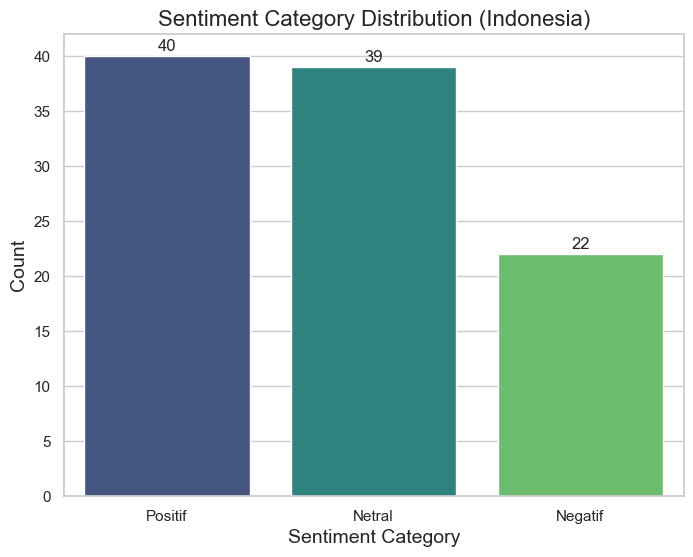

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1.index, y=sentiment_counts1.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1)):
    plt.text(i, sentiment_counts1.values[i] + 0.5, 
             sentiment_counts1.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

In [21]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


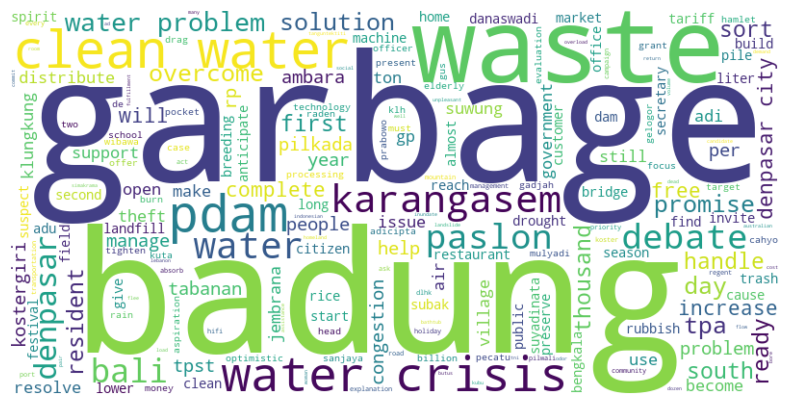

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1['cleaned_title_translated'])

# Create a word cloud
wordcloud_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_inggris, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

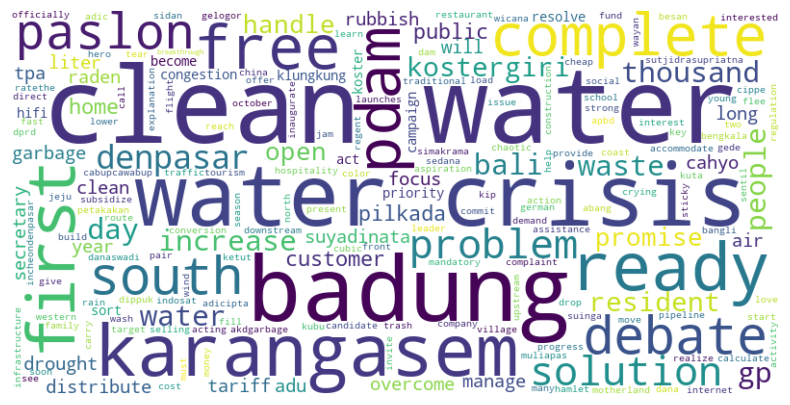

In [23]:
# Sentimen Positif
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Positif"].shape[0] != 0:
    data_sentiment1_positif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Positif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_positif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else:
    print("Tidak ada sentimen positif pada berita")

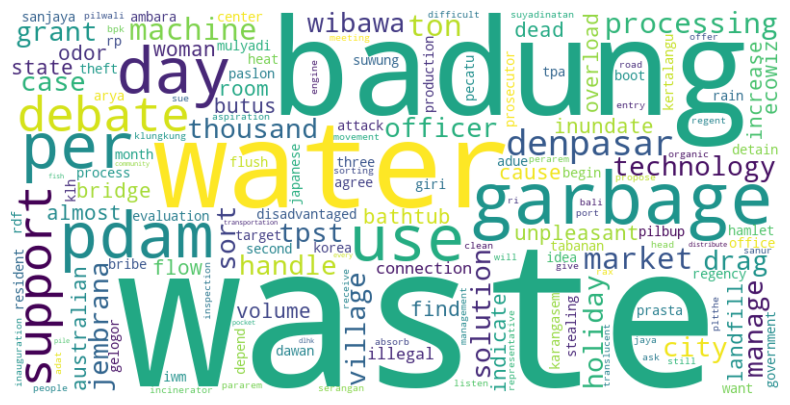

In [24]:
# Sentimen Negatif
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Negatif"].shape[0] != 0:
    data_sentiment1_negatif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Negatif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_negatif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

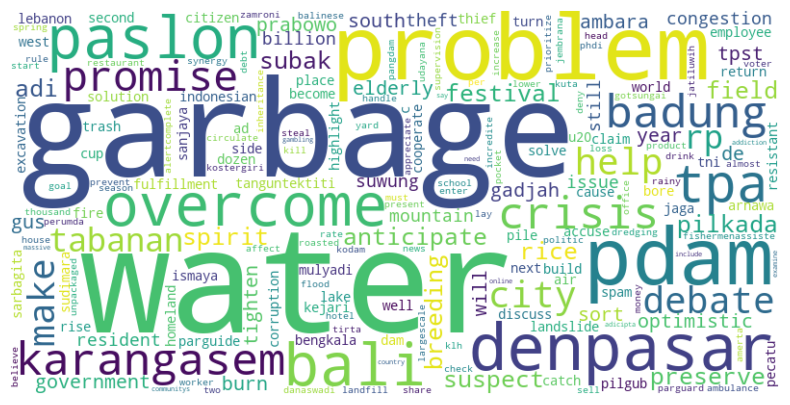

In [25]:
# Sentimen Netral
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Netral"].shape[0] != 0:
    data_sentiment1_netral = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Netral"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_netral['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_netral_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### 2. VADER

#### Sentiment

In [54]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [55]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores with VADER
def get_sentiment_vader(text):
    # VADER provides a compound score which ranges from -1 (negative) to 1 (positive)
    score = sia.polarity_scores(text)['compound']
    return score

# Apply VADER to get the sentiment scores
data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)

# Categorize sentiment with only 2 categories
def categorize_sentiment(score):
    if score > 0.05:  # Threshold for positive sentiment
        return 'Positif'
    elif score < -0.05:  # Threshold for negative sentiment
        return 'Negatif'
    else:
        return 'Netral'  # Scores between -0.05 and 0.05 considered neutral

data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_472\17249303.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)
C:\Users\asus\AppData\Local\Temp\ipykernel_472\17249303.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)


In [56]:
data_sentiment1.head()

keyword                                   title_translated  \
0     air  Dana-Swadi Ready FREE COST OF PDAM WATER LOADS...   
1     air  Caused unpleasant odors, the bridge was inundated   
2     air  Badung Pilkada Public Debate, Suyadinata is re...   
3     air  Help the Fulfillment of Water, TNI AD Builds a...   
4     air  Long drought, the demand for clean water in Ka...   

                            cleaned_title_translated  sentiment_score_english  \
0  danaswadi ready free cost of pdam water load f...                 0.300000   
1       cause unpleasant odor the bridge be inundate                -0.650000   
2  badung pilkada public debate suyadinata be rea...                 0.100000   
3  help the fulfillment of water tni ad build a b...                 0.000000   
4  long drought the demand for clean water in kar...                 0.158333   

  sentiment_category_english  sentiment_score_english_vader  \
0                    Positif                         0.7003   
1                    Negatif                        -0.4767   
2                    Positif                        -0.3818   
3                     Netral                         0.4215   
4                    Positif                         0.5423   

  sentiment_category_english_vader  
0                          Positif  
1                          Negatif  
2                          Negatif  
3                          Positif  
4                          Positif

In [57]:
sentiment_counts1_vader = data_sentiment1['sentiment_category_english_vader'].value_counts()
sentiment_counts1_vader

sentiment_category_english_vader
Negatif    44
Positif    36
Netral     21
Name: count, dtype: int64

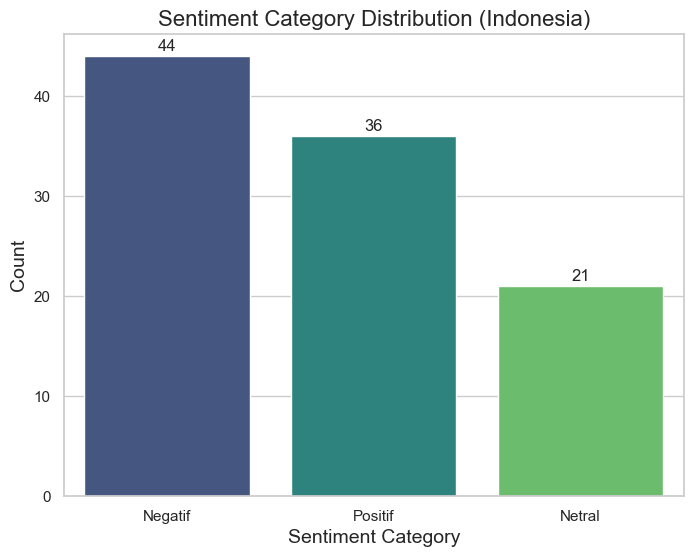

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1_vader.index, y=sentiment_counts1_vader.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1_vader)):
    plt.text(i, sentiment_counts1_vader.values[i] + 0.5, 
             sentiment_counts1_vader.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (Based on Sentiment Only)

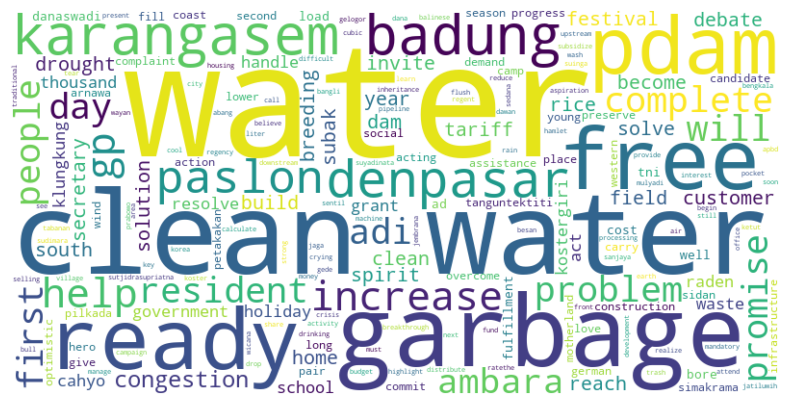

In [59]:
# Sentimen Positif
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Positif"].shape[0] != 0:
    data_sentiment1_positif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Positif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_positif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen positif pada berita")

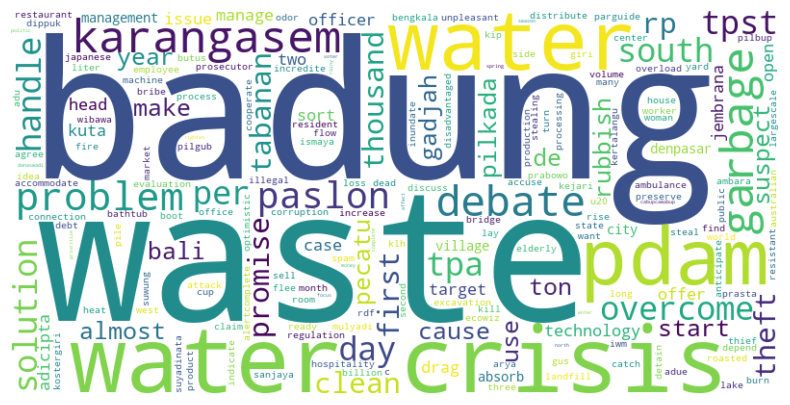

In [60]:
# Sentimen Negatif
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Negatif"].shape[0] != 0:
    data_sentiment1_negatif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Negatif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_negatif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

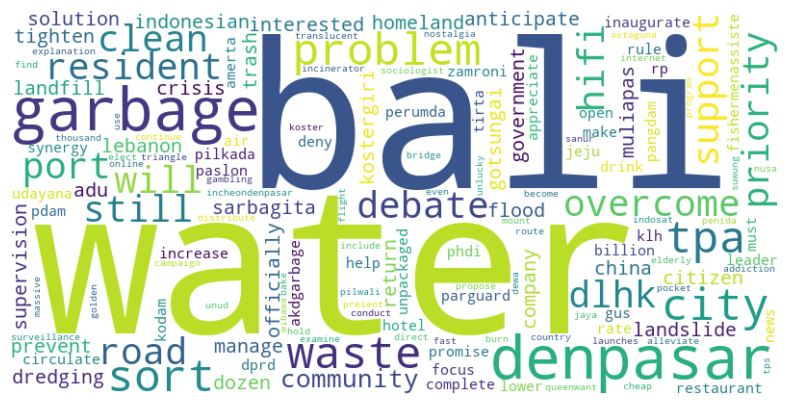

In [61]:
# Sentimen Netral
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Netral"].shape[0] != 0:
    data_sentiment1_netral_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Netral"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_netral_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_netral_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### 3. IndoBERT

#### Sentiment

In [62]:
pip install transforms torch

Note: you may need to restart the kernel to use updated packages.


In [63]:
data_sentiment2 = data_ready[['keyword','title','cleaned_title','content']]
data_sentiment2

keyword                                              title  \
0       air  Dana-Swadi Siap Gratiskan Biaya Beban Air PDAM...   
1       air  Timbulkan Bau Tak Sedap, Anjungan Penelokan Di...   
2       air  Debat Publik Pilkada Badung, Suyadinata Siap A...   
3       air  Bantu Pemenuhan Air, TNI AD Bangun Sumur Bor d...   
4       air  Kemarau Panjang, Permintaan Air Bersih di Kara...   
..      ...                                                ...   
96   sampah  Dukung Pemilahan Sampah, DLHK Kota Denpasar  D...   
97   sampah             Libur Hari Raya, Sampah Pasar Menumpuk   
98   sampah  Masih Ditemukan Warga Belum Memilah Sampah, DL...   
99   sampah  TPST Ditutup, Sampah Kembali Ditumpuk dan Meng...   
100  sampah  Hari Pertama Wajib Memilah Sampah di Kota Denp...   

                                         cleaned_title  \
0    danaswadi siap gratis biaya beban air pdam unt...   
1    timbul bau tak sedap anjung tok genang air bua...   
2    debat publik pilkada badung suyadinata siap at...   
3    bantu penuh air tni ad bangun sumur bor di tan...   
4    kemarau panjang minta air bersih di karangasem...   
..                                                 ...   
96   dukung pilah sampah dlhk kota denpasar distrib...   
97                 libur hari raya sampah pasar tumpuk   
98   masih temu warga belum mem sampah dlhk kota de...   
99   tpst tutup sampah kembali tumpuk dan gunung in...   
100  hari pertama wajib mem sampah di kota denpasar...   

                                               content  
0    AMLAPURA, BALIPOST.com - Dalam Debat Kedua Pil...  
1    BANGLI, BALIPOST.com - Pemandangan kurang seda...  
2    MANGUPURA, BALIPOST.com - Debat publik perdana...  
3    DENPASAR, BALIPOST.com - Dalam upaya membantu ...  
4    AMLAPURA, BALIPOST.com - Kemarau panjang menye...  
..                                                 ...  
96                                            Denpasar  
97                                            Denpasar  
98                                            Denpasar  
99                                                Bali  
100                                           Denpasar  

[101 rows x 4 columns]

In [64]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Load the saved model and tokenizer
model_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_model"  # The path where the model is saved
tokenizer_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_tokenizer"  # The path where the tokenizer is saved

# Load the model and tokenizer
model = BertForSequenceClassification.from_pretrained(model_load_path)
tokenizer = BertTokenizer.from_pretrained(tokenizer_load_path)

In [65]:
from torch.nn.functional import softmax  # Softmax function to convert logits to probabilities

# Initialize an empty list to collect predictions
sentiment_predict = []
probabilities = []

# Loop through the cleaned titles
for text in data_sentiment2['cleaned_title']:
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Make prediction
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradients for inference
        outputs = model(**inputs)

    # Get the logits (raw scores)
    logits = outputs.logits
    
    # Apply softmax to convert logits to probabilities
    probs = softmax(logits, dim=-1)  # Softmax along the class dimension (last dimension)

    # Get the predicted class (index of max logit)
    predicted_class = logits.argmax(dim=-1).item()

    # Get the probability of the predicted class
    predicted_prob = probs[0, predicted_class].item()

    # Convert prediction to string label
    if predicted_class == 0:
        sentiment_label = "positif"
    elif predicted_class == 1:
        sentiment_label = "netral"
    else:
        sentiment_label = "negatif"

    # Append the sentiment label and its probability
    sentiment_predict.append(sentiment_label)
    probabilities.append(predicted_prob)

# After the loop, create the DataFrame
sentiment_predict_df = pd.DataFrame({
    'sentiment': sentiment_predict,
    'probability': probabilities
})

# Add it as a new column to the original DataFrame
data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']

# Optionally, you can print the DataFrame to check the results
data_sentiment2


C:\Users\asus\AppData\Local\Temp\ipykernel_472\1096017218.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
C:\Users\asus\AppData\Local\Temp\ipykernel_472\1096017218.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']


keyword                                              title  \
0       air  Dana-Swadi Siap Gratiskan Biaya Beban Air PDAM...   
1       air  Timbulkan Bau Tak Sedap, Anjungan Penelokan Di...   
2       air  Debat Publik Pilkada Badung, Suyadinata Siap A...   
3       air  Bantu Pemenuhan Air, TNI AD Bangun Sumur Bor d...   
4       air  Kemarau Panjang, Permintaan Air Bersih di Kara...   
..      ...                                                ...   
96   sampah  Dukung Pemilahan Sampah, DLHK Kota Denpasar  D...   
97   sampah             Libur Hari Raya, Sampah Pasar Menumpuk   
98   sampah  Masih Ditemukan Warga Belum Memilah Sampah, DL...   
99   sampah  TPST Ditutup, Sampah Kembali Ditumpuk dan Meng...   
100  sampah  Hari Pertama Wajib Memilah Sampah di Kota Denp...   

                                         cleaned_title  \
0    danaswadi siap gratis biaya beban air pdam unt...   
1    timbul bau tak sedap anjung tok genang air bua...   
2    debat publik pilkada badung suyadinata siap at...   
3    bantu penuh air tni ad bangun sumur bor di tan...   
4    kemarau panjang minta air bersih di karangasem...   
..                                                 ...   
96   dukung pilah sampah dlhk kota denpasar distrib...   
97                 libur hari raya sampah pasar tumpuk   
98   masih temu warga belum mem sampah dlhk kota de...   
99   tpst tutup sampah kembali tumpuk dan gunung in...   
100  hari pertama wajib mem sampah di kota denpasar...   

                                               content  \
0    AMLAPURA, BALIPOST.com - Dalam Debat Kedua Pil...   
1    BANGLI, BALIPOST.com - Pemandangan kurang seda...   
2    MANGUPURA, BALIPOST.com - Debat publik perdana...   
3    DENPASAR, BALIPOST.com - Dalam upaya membantu ...   
4    AMLAPURA, BALIPOST.com - Kemarau panjang menye...   
..                                                 ...   
96                                            Denpasar   
97                                            Denpasar   
98                                            Denpasar   
99                                                Bali   
100                                           Denpasar   

     sentiment_score_indonesia sentiment_category_indonesia  
0                     0.994367                       netral  
1                     0.989895                      negatif  
2                     0.995898                       netral  
3                     0.994299                       netral  
4                     0.953774                       netral  
..                         ...                          ...  
96                    0.985579                       netral  
97                    0.889626                       netral  
98                    0.982892                       netral  
99                    0.973776                       netral  
100                   0.978792                       netral  

[101 rows x 6 columns]

In [66]:
sentiment_counts2 = data_sentiment2['sentiment_category_indonesia'].value_counts()
sentiment_counts2

sentiment_category_indonesia
netral     89
negatif     8
positif     4
Name: count, dtype: int64

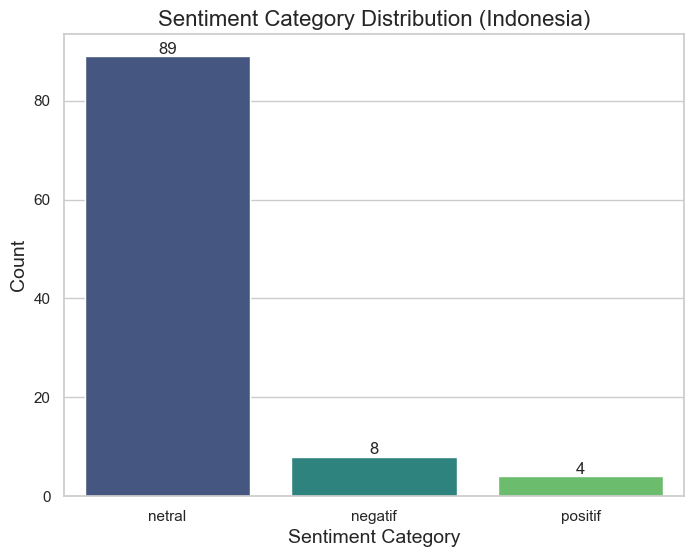

In [67]:
import seaborn as sns

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts2.index, y=sentiment_counts2.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts2)):
    plt.text(i, sentiment_counts2.values[i] + 0.5, 
             sentiment_counts2.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

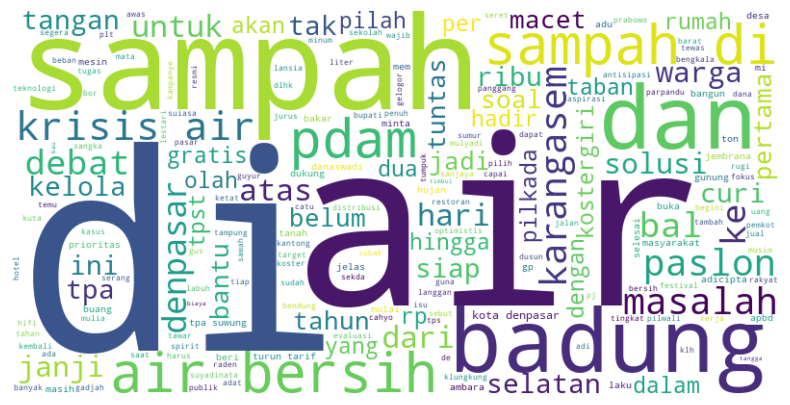

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title for cleaned_title in data_sentiment2['cleaned_title'])

# Create a word cloud
wordcloud_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_indonesia, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

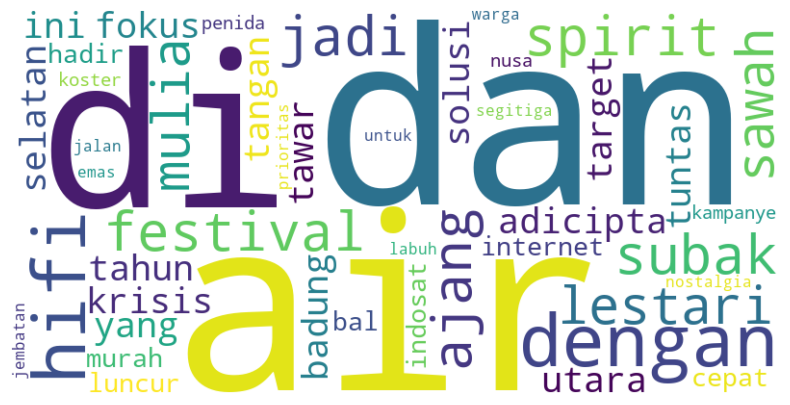

In [69]:
# Sentimen Positif
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "positif"].shape[0] != 0:
    data_sentiment2_positif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "positif"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_positif['cleaned_title'])

    # Create a word cloud
    wordcloud_positif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen positif pada berita")

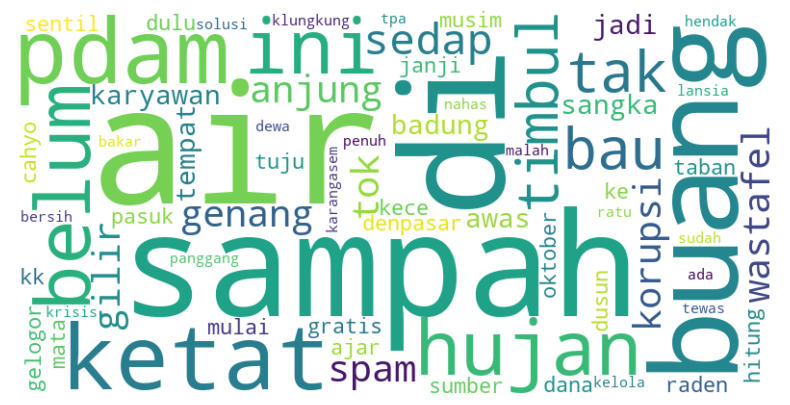

In [70]:
# Sentimen Negatif
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "negatif"].shape[0] != 0:
    data_sentiment2_negatif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "negatif"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_negatif['cleaned_title'])

    # Create a word cloud
    wordcloud_negatif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

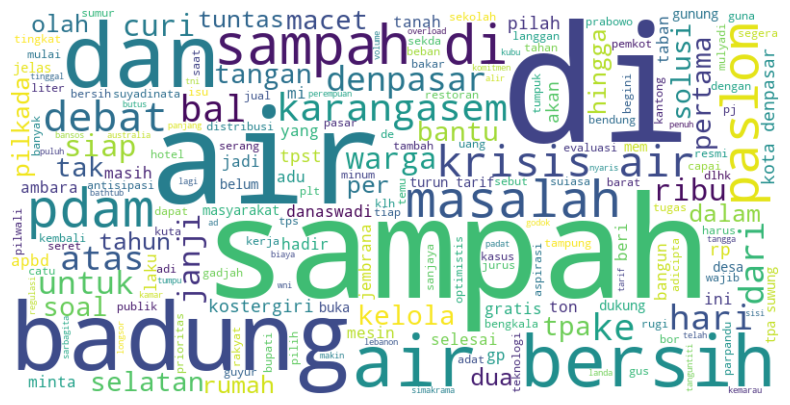

In [71]:
# Sentimen Netral
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "netral"].shape[0] != 0:
    data_sentiment2_netral = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "netral"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_netral['cleaned_title'])

    # Create a word cloud
    wordcloud_netral_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### Export Result

In [72]:
print(data_sentiment1.shape)
data_sentiment1.head()

(101, 7)


keyword                                   title_translated  \
0     air  Dana-Swadi Ready FREE COST OF PDAM WATER LOADS...   
1     air  Caused unpleasant odors, the bridge was inundated   
2     air  Badung Pilkada Public Debate, Suyadinata is re...   
3     air  Help the Fulfillment of Water, TNI AD Builds a...   
4     air  Long drought, the demand for clean water in Ka...   

                            cleaned_title_translated  sentiment_score_english  \
0  danaswadi ready free cost of pdam water load f...                 0.300000   
1       cause unpleasant odor the bridge be inundate                -0.650000   
2  badung pilkada public debate suyadinata be rea...                 0.100000   
3  help the fulfillment of water tni ad build a b...                 0.000000   
4  long drought the demand for clean water in kar...                 0.158333   

  sentiment_category_english  sentiment_score_english_vader  \
0                    Positif                         0.7003   
1                    Negatif                        -0.4767   
2                    Positif                        -0.3818   
3                     Netral                         0.4215   
4                    Positif                         0.5423   

  sentiment_category_english_vader  
0                          Positif  
1                          Negatif  
2                          Negatif  
3                          Positif  
4                          Positif

In [73]:
print(data_sentiment2.shape)
data_sentiment2.head()

(101, 6)


keyword                                              title  \
0     air  Dana-Swadi Siap Gratiskan Biaya Beban Air PDAM...   
1     air  Timbulkan Bau Tak Sedap, Anjungan Penelokan Di...   
2     air  Debat Publik Pilkada Badung, Suyadinata Siap A...   
3     air  Bantu Pemenuhan Air, TNI AD Bangun Sumur Bor d...   
4     air  Kemarau Panjang, Permintaan Air Bersih di Kara...   

                                       cleaned_title  \
0  danaswadi siap gratis biaya beban air pdam unt...   
1  timbul bau tak sedap anjung tok genang air bua...   
2  debat publik pilkada badung suyadinata siap at...   
3  bantu penuh air tni ad bangun sumur bor di tan...   
4  kemarau panjang minta air bersih di karangasem...   

                                             content  \
0  AMLAPURA, BALIPOST.com - Dalam Debat Kedua Pil...   
1  BANGLI, BALIPOST.com - Pemandangan kurang seda...   
2  MANGUPURA, BALIPOST.com - Debat publik perdana...   
3  DENPASAR, BALIPOST.com - Dalam upaya membantu ...   
4  AMLAPURA, BALIPOST.com - Kemarau panjang menye...   

   sentiment_score_indonesia sentiment_category_indonesia  
0                   0.994367                       netral  
1                   0.989895                      negatif  
2                   0.995898                       netral  
3                   0.994299                       netral  
4                   0.953774                       netral

In [74]:
# Assigning columns individually
sentiment_result = data_sentiment2.copy()  # Copy data_sentiment2 to avoid modifying the original

# Assign columns from data_sentiment1 to sentiment_result
sentiment_result['title_translated'] = data_sentiment1['title_translated']
sentiment_result['cleaned_title_translated'] = data_sentiment1['cleaned_title_translated']
sentiment_result['sentiment_category_english'] = data_sentiment1['sentiment_category_english']
sentiment_result['sentiment_score_english'] = data_sentiment1['sentiment_score_english']
sentiment_result['sentiment_category_english_vader'] = data_sentiment1['sentiment_category_english_vader']
sentiment_result['sentiment_score_english_vader'] = data_sentiment1['sentiment_score_english_vader']

print(sentiment_result.shape)
sentiment_result.head()

(101, 12)


keyword                                              title  \
0     air  Dana-Swadi Siap Gratiskan Biaya Beban Air PDAM...   
1     air  Timbulkan Bau Tak Sedap, Anjungan Penelokan Di...   
2     air  Debat Publik Pilkada Badung, Suyadinata Siap A...   
3     air  Bantu Pemenuhan Air, TNI AD Bangun Sumur Bor d...   
4     air  Kemarau Panjang, Permintaan Air Bersih di Kara...   

                                       cleaned_title  \
0  danaswadi siap gratis biaya beban air pdam unt...   
1  timbul bau tak sedap anjung tok genang air bua...   
2  debat publik pilkada badung suyadinata siap at...   
3  bantu penuh air tni ad bangun sumur bor di tan...   
4  kemarau panjang minta air bersih di karangasem...   

                                             content  \
0  AMLAPURA, BALIPOST.com - Dalam Debat Kedua Pil...   
1  BANGLI, BALIPOST.com - Pemandangan kurang seda...   
2  MANGUPURA, BALIPOST.com - Debat publik perdana...   
3  DENPASAR, BALIPOST.com - Dalam upaya membantu ...   
4  AMLAPURA, BALIPOST.com - Kemarau panjang menye...   

   sentiment_score_indonesia sentiment_category_indonesia  \
0                   0.994367                       netral   
1                   0.989895                      negatif   
2                   0.995898                       netral   
3                   0.994299                       netral   
4                   0.953774                       netral   

                                    title_translated  \
0  Dana-Swadi Ready FREE COST OF PDAM WATER LOADS...   
1  Caused unpleasant odors, the bridge was inundated   
2  Badung Pilkada Public Debate, Suyadinata is re...   
3  Help the Fulfillment of Water, TNI AD Builds a...   
4  Long drought, the demand for clean water in Ka...   

                            cleaned_title_translated  \
0  danaswadi ready free cost of pdam water load f...   
1       cause unpleasant odor the bridge be inundate   
2  badung pilkada public debate suyadinata be rea...   
3  help the fulfillment of water tni ad build a b...   
4  long drought the demand for clean water in kar...   

  sentiment_category_english  sentiment_score_english  \
0                    Positif                 0.300000   
1                    Negatif                -0.650000   
2                    Positif                 0.100000   
3                     Netral                 0.000000   
4                    Positif                 0.158333   

  sentiment_category_english_vader  sentiment_score_english_vader  
0                          Positif                         0.7003  
1                          Negatif                        -0.4767  
2                          Negatif                        -0.3818  
3                          Positif                         0.4215  
4                          Positif                         0.5423

In [75]:
sentiment_result.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/sentimentresult_sektor5_triwulan4_bali.xlsx")